# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

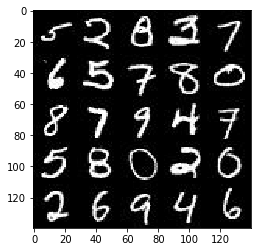

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

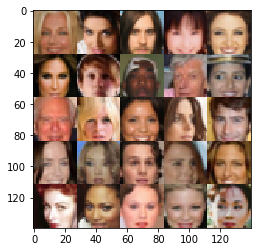

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/kehxd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_img = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    z_in = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return input_img, z_in, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2, keep_prob=0.8):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope("discriminator", reuse=reuse):
        #28*28*3
        
        layer1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="same")
        layer1 = tf.maximum(alpha*layer1, layer1)
        #layer1 = tf.nn.dropout(layer1, keep_prob)
        #14*14*64
        
        layer2 = tf.layers.conv2d(layer1, 128, 5, strides=2, padding="same")
        layer2 = tf.layers.batch_normalization(layer2, training=True)
        layer2 = tf.maximum(alpha*layer2, layer2)
        #layer2 = tf.nn.dropout(layer2, keep_prob)
        #7*7*128
        
        layer3 = tf.layers.conv2d(layer2, 256, 3, strides=2, padding="valid")
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(alpha*layer3, layer3)
        
        flat = tf.reshape(layer3, (-1, 3*3*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2, keep_prob=0.8):
    
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope("generator", reuse=not(is_train)):
        layer1 = tf.layers.dense(z, 3*3*512)
        layer1 = tf.reshape(layer1, (-1, 3, 3, 512))
        layer1 = tf.layers.batch_normalization(layer1, training = is_train)
        layer1 = tf.maximum(alpha*layer1, layer1)
        #layer1 = tf.nn.dropout(layer1, keep_prob)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 3, strides=2, padding="valid")
        layer2 = tf.layers.batch_normalization(layer2, training = is_train)
        layer2 = tf.maximum(alpha*layer2, layer2)
        #layer2 = tf.nn.dropout(layer2, keep_prob)
        
        layer3 = tf.layers.conv2d_transpose(layer2, 128, 5, strides=2, padding="same")
        layer3 = tf.layers.batch_normalization(layer3, training = is_train)
        layer3 = tf.maximum(alpha*layer3, layer3)
        #layer3 = tf.nn.dropout(layer3, keep_prob)
        
        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, 5, strides=2, padding="same")
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    disc_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_real)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_vars = tf.trainable_variables()
    #print(train_vars)
    gen_vars = [var for var in train_vars if var.name.startswith("generator")]
    disc_vars = [var for var in train_vars if var.name.startswith("discriminator")]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        disc_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)
        gen_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    return disc_opt, gen_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #tf.reset_default_graph()
    steps=0
    
    out_channel_dim = 0
    if data_image_mode == "L":
        out_channel_dim = 1
    else:
        out_channel_dim = 3
        
    #print(out_channel_dim)
        
    samples, width, height, out_channel_dim = data_shape
    
    #print(out_channel_dim)
        
    input_img, z_in, learn_r = model_inputs(width, height, out_channel_dim, z_dim)
    desc_loss, gen_loss = model_loss(input_img, z_in, out_channel_dim)
    desc_opt, gen_opt = model_opt(desc_loss, gen_loss, learn_r, beta1)
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            #steps=0
            for batch_images in get_batches(batch_size):
                batch_images = batch_images*2
                
                batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                
                sess.run(desc_opt, feed_dict={input_img: batch_images, z_in: batch_z, learn_r: learning_rate})
                sess.run(gen_opt, feed_dict={input_img: batch_images, z_in: batch_z, learn_r: learning_rate})
                #sess.run(gen_opt, feed_dict={input_img: batch_images, z_in: batch_z, learn_r: learning_rate})
                # TODO: Train Model
                steps+=1
                if steps%10 == 0:
                    train_loss_desc = desc_loss.eval({input_img: batch_images, z_in: batch_z, learn_r: learning_rate})
                    train_loss_gen = gen_loss.eval({input_img: batch_images, z_in: batch_z, learn_r: learning_rate})
                    print("Epoch {}/{}      ".format(epoch_i+1, epoch_count), 
                          "Disc. Loss: {:.4f}      ".format(train_loss_desc), 
                          "Gen. Loss: {:.4f}".format(train_loss_gen))
                
                if steps%100 == 0:
                    show_generator_output(sess,16, z_in, out_channel_dim, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2       Disc. Loss: 1.9226       Gen. Loss: 0.3318
Epoch 1/2       Disc. Loss: 0.9679       Gen. Loss: 1.0569
Epoch 1/2       Disc. Loss: 0.8859       Gen. Loss: 1.0789
Epoch 1/2       Disc. Loss: 0.7178       Gen. Loss: 1.5211
Epoch 1/2       Disc. Loss: 0.9563       Gen. Loss: 3.0027
Epoch 1/2       Disc. Loss: 0.8516       Gen. Loss: 1.6063
Epoch 1/2       Disc. Loss: 0.8222       Gen. Loss: 1.3059
Epoch 1/2       Disc. Loss: 0.9140       Gen. Loss: 1.1243
Epoch 1/2       Disc. Loss: 0.8350       Gen. Loss: 1.3640
Epoch 1/2       Disc. Loss: 0.7559       Gen. Loss: 1.5679


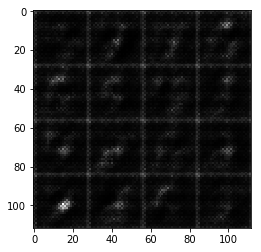

Epoch 1/2       Disc. Loss: 0.9680       Gen. Loss: 1.0706
Epoch 1/2       Disc. Loss: 0.8880       Gen. Loss: 1.0854
Epoch 1/2       Disc. Loss: 0.8140       Gen. Loss: 2.0925
Epoch 1/2       Disc. Loss: 0.7775       Gen. Loss: 1.8569
Epoch 1/2       Disc. Loss: 1.0844       Gen. Loss: 0.8126
Epoch 1/2       Disc. Loss: 0.9605       Gen. Loss: 1.7192
Epoch 1/2       Disc. Loss: 0.9927       Gen. Loss: 0.9575
Epoch 1/2       Disc. Loss: 1.0855       Gen. Loss: 0.9841
Epoch 1/2       Disc. Loss: 1.0213       Gen. Loss: 1.3373
Epoch 1/2       Disc. Loss: 1.0755       Gen. Loss: 0.9062


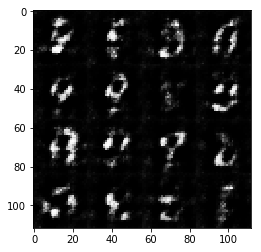

Epoch 1/2       Disc. Loss: 1.3095       Gen. Loss: 0.5820
Epoch 1/2       Disc. Loss: 1.0028       Gen. Loss: 1.0212
Epoch 1/2       Disc. Loss: 0.9667       Gen. Loss: 1.3625
Epoch 1/2       Disc. Loss: 0.9726       Gen. Loss: 1.4854
Epoch 1/2       Disc. Loss: 0.8973       Gen. Loss: 1.2453
Epoch 1/2       Disc. Loss: 1.0355       Gen. Loss: 0.8685
Epoch 1/2       Disc. Loss: 0.9363       Gen. Loss: 1.4394
Epoch 1/2       Disc. Loss: 0.8322       Gen. Loss: 1.4705
Epoch 1/2       Disc. Loss: 1.0750       Gen. Loss: 0.8803
Epoch 1/2       Disc. Loss: 1.0051       Gen. Loss: 1.2232


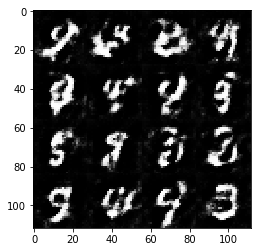

Epoch 1/2       Disc. Loss: 1.0077       Gen. Loss: 0.9099
Epoch 1/2       Disc. Loss: 0.8901       Gen. Loss: 1.4809
Epoch 1/2       Disc. Loss: 0.9912       Gen. Loss: 1.3017
Epoch 1/2       Disc. Loss: 0.9122       Gen. Loss: 1.0407
Epoch 1/2       Disc. Loss: 1.1015       Gen. Loss: 0.7406
Epoch 1/2       Disc. Loss: 0.7685       Gen. Loss: 1.8433
Epoch 1/2       Disc. Loss: 0.9357       Gen. Loss: 1.4317
Epoch 1/2       Disc. Loss: 0.9256       Gen. Loss: 1.0028
Epoch 1/2       Disc. Loss: 0.9613       Gen. Loss: 1.7149
Epoch 1/2       Disc. Loss: 0.9094       Gen. Loss: 1.5151


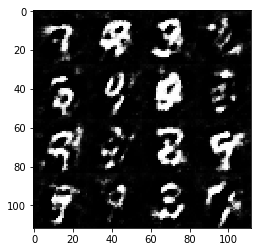

Epoch 1/2       Disc. Loss: 0.8579       Gen. Loss: 1.7099
Epoch 1/2       Disc. Loss: 1.0336       Gen. Loss: 0.7704
Epoch 1/2       Disc. Loss: 0.9456       Gen. Loss: 1.5755
Epoch 1/2       Disc. Loss: 0.9036       Gen. Loss: 2.2526
Epoch 1/2       Disc. Loss: 0.9497       Gen. Loss: 0.9575
Epoch 1/2       Disc. Loss: 0.8838       Gen. Loss: 1.3595
Epoch 1/2       Disc. Loss: 1.0875       Gen. Loss: 0.7365
Epoch 1/2       Disc. Loss: 1.0676       Gen. Loss: 0.7839
Epoch 1/2       Disc. Loss: 0.9627       Gen. Loss: 0.8899
Epoch 1/2       Disc. Loss: 1.0730       Gen. Loss: 0.7753


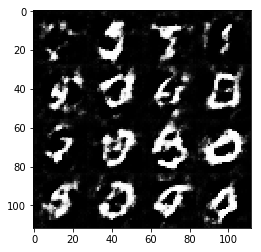

Epoch 1/2       Disc. Loss: 0.8491       Gen. Loss: 1.6076
Epoch 1/2       Disc. Loss: 0.7592       Gen. Loss: 1.3464
Epoch 1/2       Disc. Loss: 0.9033       Gen. Loss: 1.3605
Epoch 1/2       Disc. Loss: 0.9175       Gen. Loss: 1.9074
Epoch 1/2       Disc. Loss: 0.9082       Gen. Loss: 1.0616
Epoch 1/2       Disc. Loss: 1.0205       Gen. Loss: 0.8874
Epoch 1/2       Disc. Loss: 0.9879       Gen. Loss: 1.0049
Epoch 1/2       Disc. Loss: 1.1000       Gen. Loss: 0.8044
Epoch 1/2       Disc. Loss: 0.7984       Gen. Loss: 1.3540
Epoch 1/2       Disc. Loss: 1.1066       Gen. Loss: 0.7750


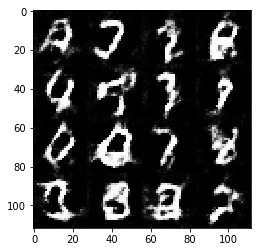

Epoch 1/2       Disc. Loss: 0.9044       Gen. Loss: 1.5158
Epoch 1/2       Disc. Loss: 0.9743       Gen. Loss: 1.2474
Epoch 1/2       Disc. Loss: 1.1555       Gen. Loss: 0.6805
Epoch 1/2       Disc. Loss: 1.0634       Gen. Loss: 0.8887
Epoch 1/2       Disc. Loss: 1.0984       Gen. Loss: 0.8057
Epoch 1/2       Disc. Loss: 1.0003       Gen. Loss: 1.3766
Epoch 1/2       Disc. Loss: 0.9210       Gen. Loss: 1.6095
Epoch 1/2       Disc. Loss: 1.0770       Gen. Loss: 0.7231
Epoch 1/2       Disc. Loss: 0.9343       Gen. Loss: 1.2328
Epoch 1/2       Disc. Loss: 0.8624       Gen. Loss: 1.5206


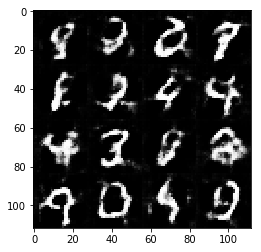

Epoch 1/2       Disc. Loss: 1.1230       Gen. Loss: 0.8007
Epoch 1/2       Disc. Loss: 0.8989       Gen. Loss: 1.3886
Epoch 1/2       Disc. Loss: 0.8809       Gen. Loss: 1.1202
Epoch 1/2       Disc. Loss: 1.0511       Gen. Loss: 0.8185
Epoch 1/2       Disc. Loss: 0.9680       Gen. Loss: 0.9203
Epoch 1/2       Disc. Loss: 0.8918       Gen. Loss: 1.1344
Epoch 1/2       Disc. Loss: 0.7700       Gen. Loss: 1.2788
Epoch 1/2       Disc. Loss: 0.9814       Gen. Loss: 1.1375
Epoch 1/2       Disc. Loss: 0.9945       Gen. Loss: 1.6177
Epoch 1/2       Disc. Loss: 1.0294       Gen. Loss: 0.8247


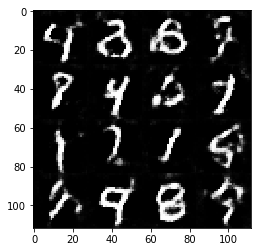

Epoch 1/2       Disc. Loss: 1.0757       Gen. Loss: 0.7705
Epoch 1/2       Disc. Loss: 1.0242       Gen. Loss: 0.9174
Epoch 1/2       Disc. Loss: 0.8937       Gen. Loss: 1.3542
Epoch 1/2       Disc. Loss: 0.9726       Gen. Loss: 1.6311
Epoch 1/2       Disc. Loss: 0.7472       Gen. Loss: 1.5788
Epoch 1/2       Disc. Loss: 0.9108       Gen. Loss: 0.9743
Epoch 1/2       Disc. Loss: 0.7731       Gen. Loss: 1.4280
Epoch 1/2       Disc. Loss: 1.1456       Gen. Loss: 0.7521
Epoch 1/2       Disc. Loss: 0.9034       Gen. Loss: 1.2337
Epoch 1/2       Disc. Loss: 1.1371       Gen. Loss: 0.7281


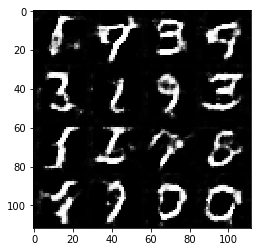

Epoch 1/2       Disc. Loss: 0.9114       Gen. Loss: 1.1179
Epoch 1/2       Disc. Loss: 1.0967       Gen. Loss: 2.0989
Epoch 1/2       Disc. Loss: 0.9122       Gen. Loss: 1.3133
Epoch 1/2       Disc. Loss: 0.8443       Gen. Loss: 1.3279
Epoch 1/2       Disc. Loss: 1.0839       Gen. Loss: 0.8624
Epoch 1/2       Disc. Loss: 0.8948       Gen. Loss: 1.1209
Epoch 1/2       Disc. Loss: 1.5613       Gen. Loss: 0.4257
Epoch 1/2       Disc. Loss: 0.8910       Gen. Loss: 1.3775
Epoch 1/2       Disc. Loss: 0.8972       Gen. Loss: 1.3479
Epoch 1/2       Disc. Loss: 0.9147       Gen. Loss: 1.0021


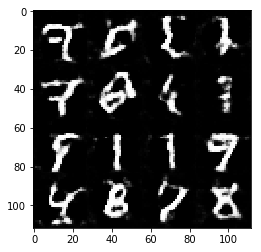

Epoch 1/2       Disc. Loss: 0.9659       Gen. Loss: 0.9795
Epoch 1/2       Disc. Loss: 0.9949       Gen. Loss: 0.8583
Epoch 1/2       Disc. Loss: 1.1159       Gen. Loss: 0.7296
Epoch 1/2       Disc. Loss: 0.9865       Gen. Loss: 0.9121
Epoch 1/2       Disc. Loss: 1.0010       Gen. Loss: 0.8803
Epoch 1/2       Disc. Loss: 0.8209       Gen. Loss: 1.1846
Epoch 1/2       Disc. Loss: 1.0444       Gen. Loss: 0.7774
Epoch 1/2       Disc. Loss: 0.9515       Gen. Loss: 0.9280
Epoch 1/2       Disc. Loss: 0.9652       Gen. Loss: 1.0678
Epoch 1/2       Disc. Loss: 1.1575       Gen. Loss: 0.7534


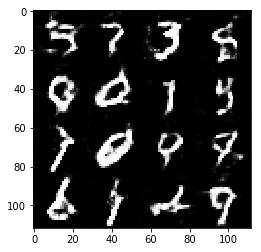

Epoch 1/2       Disc. Loss: 0.8259       Gen. Loss: 1.4519
Epoch 1/2       Disc. Loss: 0.8637       Gen. Loss: 1.1439
Epoch 1/2       Disc. Loss: 0.9845       Gen. Loss: 0.8990
Epoch 1/2       Disc. Loss: 1.3419       Gen. Loss: 0.5644
Epoch 1/2       Disc. Loss: 0.8443       Gen. Loss: 1.6769
Epoch 1/2       Disc. Loss: 0.8271       Gen. Loss: 1.2576
Epoch 1/2       Disc. Loss: 0.9710       Gen. Loss: 0.8687
Epoch 1/2       Disc. Loss: 0.9421       Gen. Loss: 0.9960
Epoch 1/2       Disc. Loss: 0.9871       Gen. Loss: 0.8477
Epoch 1/2       Disc. Loss: 0.8784       Gen. Loss: 1.0655


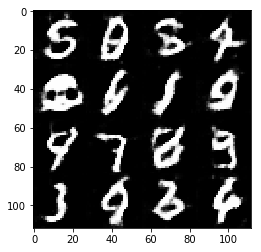

Epoch 1/2       Disc. Loss: 0.8746       Gen. Loss: 1.3264
Epoch 1/2       Disc. Loss: 1.1619       Gen. Loss: 0.6770
Epoch 1/2       Disc. Loss: 1.0160       Gen. Loss: 0.9272
Epoch 1/2       Disc. Loss: 0.7134       Gen. Loss: 1.8777
Epoch 1/2       Disc. Loss: 0.8640       Gen. Loss: 1.1598
Epoch 1/2       Disc. Loss: 1.0827       Gen. Loss: 0.7423
Epoch 1/2       Disc. Loss: 0.9364       Gen. Loss: 1.3727
Epoch 1/2       Disc. Loss: 0.8412       Gen. Loss: 2.2089
Epoch 1/2       Disc. Loss: 0.9017       Gen. Loss: 1.0152
Epoch 1/2       Disc. Loss: 1.1481       Gen. Loss: 0.6471


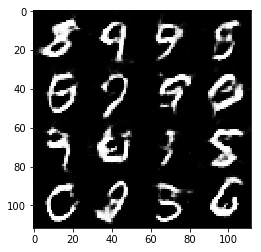

Epoch 1/2       Disc. Loss: 0.9132       Gen. Loss: 0.9325
Epoch 1/2       Disc. Loss: 0.7341       Gen. Loss: 1.4383
Epoch 1/2       Disc. Loss: 0.8228       Gen. Loss: 1.2922
Epoch 1/2       Disc. Loss: 0.9613       Gen. Loss: 0.8623
Epoch 1/2       Disc. Loss: 0.9666       Gen. Loss: 0.8452
Epoch 1/2       Disc. Loss: 0.7868       Gen. Loss: 1.4549
Epoch 1/2       Disc. Loss: 0.9507       Gen. Loss: 1.0172
Epoch 1/2       Disc. Loss: 1.1321       Gen. Loss: 0.6576
Epoch 1/2       Disc. Loss: 1.1812       Gen. Loss: 1.0345
Epoch 1/2       Disc. Loss: 1.2661       Gen. Loss: 0.6566


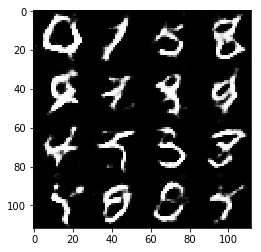

Epoch 1/2       Disc. Loss: 0.7640       Gen. Loss: 1.3187
Epoch 1/2       Disc. Loss: 0.9762       Gen. Loss: 0.8993
Epoch 1/2       Disc. Loss: 1.0682       Gen. Loss: 0.7587
Epoch 1/2       Disc. Loss: 0.8575       Gen. Loss: 1.0354
Epoch 1/2       Disc. Loss: 0.7813       Gen. Loss: 1.2778
Epoch 1/2       Disc. Loss: 0.8506       Gen. Loss: 1.4700
Epoch 1/2       Disc. Loss: 0.8726       Gen. Loss: 1.1184
Epoch 1/2       Disc. Loss: 1.4828       Gen. Loss: 0.4788
Epoch 1/2       Disc. Loss: 0.8154       Gen. Loss: 1.2903
Epoch 1/2       Disc. Loss: 0.9966       Gen. Loss: 0.9683


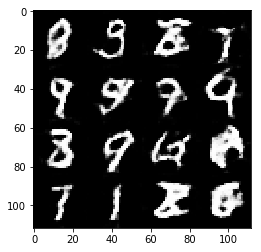

Epoch 1/2       Disc. Loss: 0.8718       Gen. Loss: 1.0563
Epoch 1/2       Disc. Loss: 0.7608       Gen. Loss: 1.2669
Epoch 1/2       Disc. Loss: 1.0950       Gen. Loss: 0.7387
Epoch 1/2       Disc. Loss: 1.0524       Gen. Loss: 0.9468
Epoch 1/2       Disc. Loss: 0.7984       Gen. Loss: 1.5387
Epoch 1/2       Disc. Loss: 0.6800       Gen. Loss: 1.6491
Epoch 1/2       Disc. Loss: 0.8173       Gen. Loss: 1.3026
Epoch 1/2       Disc. Loss: 1.0218       Gen. Loss: 0.8572
Epoch 1/2       Disc. Loss: 0.9590       Gen. Loss: 0.9306
Epoch 1/2       Disc. Loss: 1.2841       Gen. Loss: 0.5659


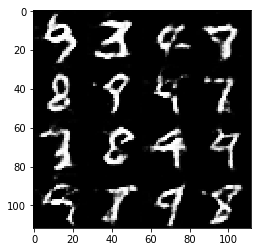

Epoch 1/2       Disc. Loss: 1.0580       Gen. Loss: 0.8025
Epoch 1/2       Disc. Loss: 1.1257       Gen. Loss: 0.7089
Epoch 1/2       Disc. Loss: 0.8072       Gen. Loss: 1.1510
Epoch 1/2       Disc. Loss: 0.8383       Gen. Loss: 1.5043
Epoch 1/2       Disc. Loss: 0.8204       Gen. Loss: 1.2546
Epoch 1/2       Disc. Loss: 1.0596       Gen. Loss: 0.7995
Epoch 1/2       Disc. Loss: 0.9306       Gen. Loss: 1.2235
Epoch 1/2       Disc. Loss: 0.9717       Gen. Loss: 0.9247
Epoch 1/2       Disc. Loss: 0.7047       Gen. Loss: 1.3808
Epoch 1/2       Disc. Loss: 0.8361       Gen. Loss: 1.1790


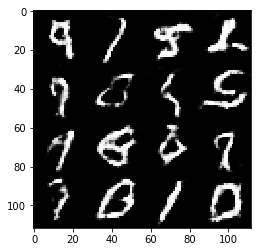

Epoch 1/2       Disc. Loss: 1.6892       Gen. Loss: 0.3593
Epoch 1/2       Disc. Loss: 1.1423       Gen. Loss: 2.4655
Epoch 1/2       Disc. Loss: 1.1282       Gen. Loss: 0.7190
Epoch 1/2       Disc. Loss: 0.9036       Gen. Loss: 1.0975
Epoch 1/2       Disc. Loss: 0.7507       Gen. Loss: 1.2881
Epoch 1/2       Disc. Loss: 0.8353       Gen. Loss: 1.2115
Epoch 1/2       Disc. Loss: 0.8422       Gen. Loss: 1.1515
Epoch 1/2       Disc. Loss: 0.9393       Gen. Loss: 0.8949
Epoch 1/2       Disc. Loss: 1.3990       Gen. Loss: 0.5457
Epoch 1/2       Disc. Loss: 0.8501       Gen. Loss: 1.8367


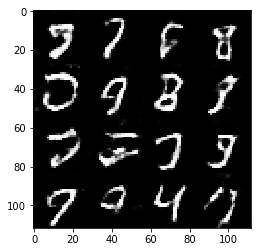

Epoch 1/2       Disc. Loss: 0.9304       Gen. Loss: 0.9861
Epoch 1/2       Disc. Loss: 0.9575       Gen. Loss: 0.9099
Epoch 1/2       Disc. Loss: 0.9053       Gen. Loss: 1.0362
Epoch 1/2       Disc. Loss: 2.6131       Gen. Loss: 4.1910
Epoch 1/2       Disc. Loss: 0.8580       Gen. Loss: 1.7086
Epoch 1/2       Disc. Loss: 0.7696       Gen. Loss: 1.3134
Epoch 1/2       Disc. Loss: 1.1242       Gen. Loss: 0.7016
Epoch 2/2       Disc. Loss: 0.8543       Gen. Loss: 1.0545
Epoch 2/2       Disc. Loss: 0.7114       Gen. Loss: 1.3998
Epoch 2/2       Disc. Loss: 0.8676       Gen. Loss: 1.1286


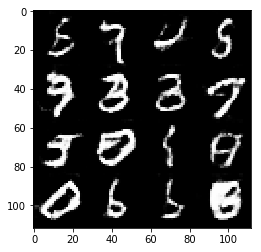

Epoch 2/2       Disc. Loss: 0.9435       Gen. Loss: 0.9104
Epoch 2/2       Disc. Loss: 0.7792       Gen. Loss: 1.1863
Epoch 2/2       Disc. Loss: 1.0842       Gen. Loss: 1.8854
Epoch 2/2       Disc. Loss: 0.8320       Gen. Loss: 1.1983
Epoch 2/2       Disc. Loss: 0.8875       Gen. Loss: 1.6362
Epoch 2/2       Disc. Loss: 0.7192       Gen. Loss: 1.4660
Epoch 2/2       Disc. Loss: 0.9028       Gen. Loss: 0.9898
Epoch 2/2       Disc. Loss: 1.5318       Gen. Loss: 0.4463
Epoch 2/2       Disc. Loss: 0.8761       Gen. Loss: 1.1886
Epoch 2/2       Disc. Loss: 1.4972       Gen. Loss: 0.4891


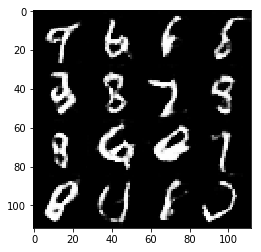

Epoch 2/2       Disc. Loss: 0.7748       Gen. Loss: 1.4193
Epoch 2/2       Disc. Loss: 0.9007       Gen. Loss: 1.6107
Epoch 2/2       Disc. Loss: 0.8969       Gen. Loss: 0.9481
Epoch 2/2       Disc. Loss: 0.7183       Gen. Loss: 1.3436
Epoch 2/2       Disc. Loss: 0.8323       Gen. Loss: 1.1126
Epoch 2/2       Disc. Loss: 1.1214       Gen. Loss: 0.6927
Epoch 2/2       Disc. Loss: 0.7556       Gen. Loss: 1.3086
Epoch 2/2       Disc. Loss: 0.8723       Gen. Loss: 1.2247
Epoch 2/2       Disc. Loss: 0.8072       Gen. Loss: 1.1423
Epoch 2/2       Disc. Loss: 0.8744       Gen. Loss: 1.1293


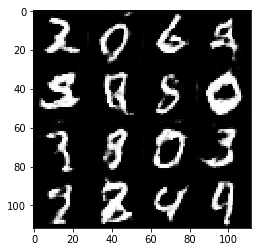

Epoch 2/2       Disc. Loss: 0.9388       Gen. Loss: 0.9894
Epoch 2/2       Disc. Loss: 1.0352       Gen. Loss: 0.8165
Epoch 2/2       Disc. Loss: 0.8790       Gen. Loss: 0.9841
Epoch 2/2       Disc. Loss: 0.8503       Gen. Loss: 1.2083
Epoch 2/2       Disc. Loss: 0.7946       Gen. Loss: 1.5685
Epoch 2/2       Disc. Loss: 0.7926       Gen. Loss: 1.2478
Epoch 2/2       Disc. Loss: 0.7266       Gen. Loss: 1.4195
Epoch 2/2       Disc. Loss: 1.0694       Gen. Loss: 0.7872
Epoch 2/2       Disc. Loss: 0.8915       Gen. Loss: 1.2403
Epoch 2/2       Disc. Loss: 0.7559       Gen. Loss: 1.2880


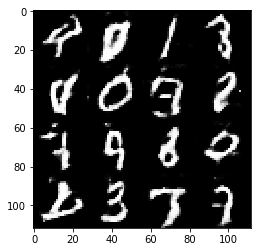

Epoch 2/2       Disc. Loss: 1.1259       Gen. Loss: 0.6808
Epoch 2/2       Disc. Loss: 0.6430       Gen. Loss: 2.2595
Epoch 2/2       Disc. Loss: 0.8441       Gen. Loss: 1.1283
Epoch 2/2       Disc. Loss: 0.7705       Gen. Loss: 1.9443
Epoch 2/2       Disc. Loss: 0.7608       Gen. Loss: 1.3906
Epoch 2/2       Disc. Loss: 0.7076       Gen. Loss: 1.4959
Epoch 2/2       Disc. Loss: 0.8128       Gen. Loss: 1.1411
Epoch 2/2       Disc. Loss: 1.2090       Gen. Loss: 0.6310
Epoch 2/2       Disc. Loss: 1.7132       Gen. Loss: 0.3350
Epoch 2/2       Disc. Loss: 1.0500       Gen. Loss: 0.8210


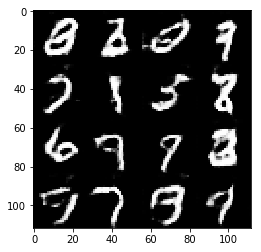

Epoch 2/2       Disc. Loss: 0.8725       Gen. Loss: 1.0146
Epoch 2/2       Disc. Loss: 1.1902       Gen. Loss: 0.7380
Epoch 2/2       Disc. Loss: 0.6374       Gen. Loss: 1.6616
Epoch 2/2       Disc. Loss: 0.9728       Gen. Loss: 0.9361
Epoch 2/2       Disc. Loss: 0.6634       Gen. Loss: 1.5231
Epoch 2/2       Disc. Loss: 0.7300       Gen. Loss: 1.6634
Epoch 2/2       Disc. Loss: 0.6583       Gen. Loss: 1.5908
Epoch 2/2       Disc. Loss: 0.7341       Gen. Loss: 1.5248
Epoch 2/2       Disc. Loss: 0.5829       Gen. Loss: 1.8363
Epoch 2/2       Disc. Loss: 0.8633       Gen. Loss: 1.5536


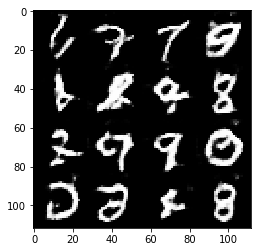

Epoch 2/2       Disc. Loss: 1.2036       Gen. Loss: 0.7162
Epoch 2/2       Disc. Loss: 0.7467       Gen. Loss: 1.3570
Epoch 2/2       Disc. Loss: 0.8423       Gen. Loss: 1.0957
Epoch 2/2       Disc. Loss: 0.8120       Gen. Loss: 1.9230
Epoch 2/2       Disc. Loss: 0.9745       Gen. Loss: 0.9529
Epoch 2/2       Disc. Loss: 1.7965       Gen. Loss: 0.4049
Epoch 2/2       Disc. Loss: 1.1241       Gen. Loss: 0.8276
Epoch 2/2       Disc. Loss: 0.7198       Gen. Loss: 1.4908
Epoch 2/2       Disc. Loss: 0.6956       Gen. Loss: 1.3568
Epoch 2/2       Disc. Loss: 0.5585       Gen. Loss: 2.0753


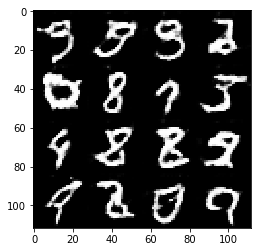

Epoch 2/2       Disc. Loss: 0.6821       Gen. Loss: 1.5375
Epoch 2/2       Disc. Loss: 1.0639       Gen. Loss: 0.8052
Epoch 2/2       Disc. Loss: 1.0413       Gen. Loss: 0.8285
Epoch 2/2       Disc. Loss: 0.8552       Gen. Loss: 1.2070
Epoch 2/2       Disc. Loss: 0.9858       Gen. Loss: 0.9152
Epoch 2/2       Disc. Loss: 0.8491       Gen. Loss: 1.1951
Epoch 2/2       Disc. Loss: 0.9369       Gen. Loss: 0.9913
Epoch 2/2       Disc. Loss: 0.6479       Gen. Loss: 1.8166
Epoch 2/2       Disc. Loss: 0.6625       Gen. Loss: 1.5429
Epoch 2/2       Disc. Loss: 1.2783       Gen. Loss: 0.6014


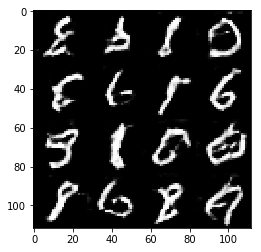

Epoch 2/2       Disc. Loss: 1.2306       Gen. Loss: 0.6629
Epoch 2/2       Disc. Loss: 0.9300       Gen. Loss: 0.9926
Epoch 2/2       Disc. Loss: 0.6438       Gen. Loss: 1.7061
Epoch 2/2       Disc. Loss: 0.8212       Gen. Loss: 1.1717
Epoch 2/2       Disc. Loss: 0.7606       Gen. Loss: 1.2985
Epoch 2/2       Disc. Loss: 0.8038       Gen. Loss: 1.2644
Epoch 2/2       Disc. Loss: 0.5846       Gen. Loss: 1.9442
Epoch 2/2       Disc. Loss: 0.6729       Gen. Loss: 1.8140
Epoch 2/2       Disc. Loss: 0.6782       Gen. Loss: 1.8603
Epoch 2/2       Disc. Loss: 0.7088       Gen. Loss: 1.3731


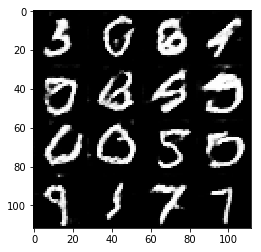

Epoch 2/2       Disc. Loss: 0.8194       Gen. Loss: 1.1618
Epoch 2/2       Disc. Loss: 0.7140       Gen. Loss: 1.4080
Epoch 2/2       Disc. Loss: 0.9413       Gen. Loss: 0.9105
Epoch 2/2       Disc. Loss: 0.7949       Gen. Loss: 1.1353
Epoch 2/2       Disc. Loss: 0.7770       Gen. Loss: 1.2095
Epoch 2/2       Disc. Loss: 0.7147       Gen. Loss: 1.5271
Epoch 2/2       Disc. Loss: 1.4303       Gen. Loss: 0.5291
Epoch 2/2       Disc. Loss: 1.4833       Gen. Loss: 0.5324
Epoch 2/2       Disc. Loss: 0.9206       Gen. Loss: 1.0438
Epoch 2/2       Disc. Loss: 1.0078       Gen. Loss: 0.8305


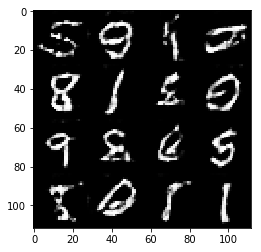

Epoch 2/2       Disc. Loss: 0.7007       Gen. Loss: 1.4209
Epoch 2/2       Disc. Loss: 0.8597       Gen. Loss: 1.0516
Epoch 2/2       Disc. Loss: 0.9113       Gen. Loss: 0.9539
Epoch 2/2       Disc. Loss: 0.6328       Gen. Loss: 2.1013
Epoch 2/2       Disc. Loss: 0.5895       Gen. Loss: 1.7351
Epoch 2/2       Disc. Loss: 1.3217       Gen. Loss: 0.5563
Epoch 2/2       Disc. Loss: 1.6379       Gen. Loss: 0.4518
Epoch 2/2       Disc. Loss: 0.9198       Gen. Loss: 0.9917
Epoch 2/2       Disc. Loss: 0.6592       Gen. Loss: 1.5270
Epoch 2/2       Disc. Loss: 0.7377       Gen. Loss: 1.5966


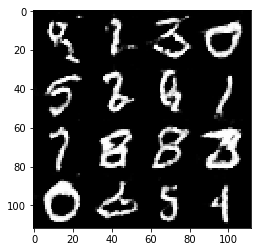

Epoch 2/2       Disc. Loss: 0.6971       Gen. Loss: 1.8724
Epoch 2/2       Disc. Loss: 0.8296       Gen. Loss: 1.1120
Epoch 2/2       Disc. Loss: 0.5806       Gen. Loss: 1.7172
Epoch 2/2       Disc. Loss: 2.2538       Gen. Loss: 4.3973
Epoch 2/2       Disc. Loss: 0.8541       Gen. Loss: 1.1232
Epoch 2/2       Disc. Loss: 0.7734       Gen. Loss: 1.2980
Epoch 2/2       Disc. Loss: 0.8086       Gen. Loss: 1.1948
Epoch 2/2       Disc. Loss: 0.9324       Gen. Loss: 0.9633
Epoch 2/2       Disc. Loss: 0.7944       Gen. Loss: 1.2472
Epoch 2/2       Disc. Loss: 0.9283       Gen. Loss: 0.9118


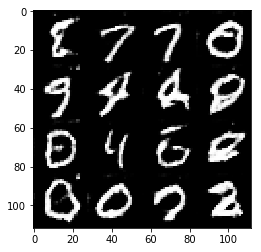

Epoch 2/2       Disc. Loss: 0.9905       Gen. Loss: 2.8975
Epoch 2/2       Disc. Loss: 0.7586       Gen. Loss: 1.4384
Epoch 2/2       Disc. Loss: 1.2745       Gen. Loss: 0.6578
Epoch 2/2       Disc. Loss: 0.7898       Gen. Loss: 1.1793
Epoch 2/2       Disc. Loss: 0.7365       Gen. Loss: 1.2722
Epoch 2/2       Disc. Loss: 0.7514       Gen. Loss: 1.3651
Epoch 2/2       Disc. Loss: 0.6764       Gen. Loss: 1.4516
Epoch 2/2       Disc. Loss: 0.7239       Gen. Loss: 1.5253
Epoch 2/2       Disc. Loss: 0.7442       Gen. Loss: 1.4220
Epoch 2/2       Disc. Loss: 0.7434       Gen. Loss: 1.2457


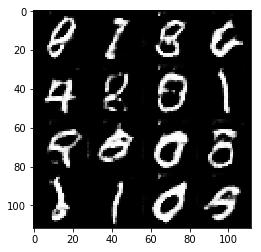

Epoch 2/2       Disc. Loss: 0.8636       Gen. Loss: 1.0251
Epoch 2/2       Disc. Loss: 0.7402       Gen. Loss: 1.2498
Epoch 2/2       Disc. Loss: 0.9920       Gen. Loss: 0.8770
Epoch 2/2       Disc. Loss: 0.6245       Gen. Loss: 1.9986
Epoch 2/2       Disc. Loss: 0.7140       Gen. Loss: 1.4253
Epoch 2/2       Disc. Loss: 0.9891       Gen. Loss: 0.9123
Epoch 2/2       Disc. Loss: 0.8177       Gen. Loss: 1.3044
Epoch 2/2       Disc. Loss: 0.9587       Gen. Loss: 1.0144
Epoch 2/2       Disc. Loss: 0.9430       Gen. Loss: 1.2474
Epoch 2/2       Disc. Loss: 1.4861       Gen. Loss: 0.4801


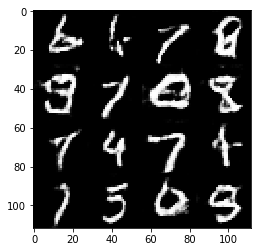

Epoch 2/2       Disc. Loss: 0.8753       Gen. Loss: 1.1014
Epoch 2/2       Disc. Loss: 0.5965       Gen. Loss: 1.8056
Epoch 2/2       Disc. Loss: 0.8252       Gen. Loss: 1.1584
Epoch 2/2       Disc. Loss: 0.9761       Gen. Loss: 2.5750
Epoch 2/2       Disc. Loss: 0.8980       Gen. Loss: 1.0796
Epoch 2/2       Disc. Loss: 0.7750       Gen. Loss: 1.4916
Epoch 2/2       Disc. Loss: 0.8030       Gen. Loss: 1.4565
Epoch 2/2       Disc. Loss: 0.9247       Gen. Loss: 0.9812
Epoch 2/2       Disc. Loss: 0.7945       Gen. Loss: 1.2925
Epoch 2/2       Disc. Loss: 0.6543       Gen. Loss: 1.5916


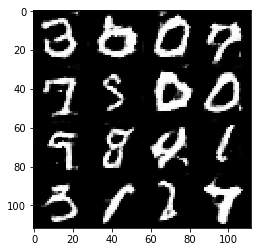

Epoch 2/2       Disc. Loss: 0.7770       Gen. Loss: 1.2117
Epoch 2/2       Disc. Loss: 0.9125       Gen. Loss: 0.9919
Epoch 2/2       Disc. Loss: 0.6149       Gen. Loss: 1.6111
Epoch 2/2       Disc. Loss: 0.8202       Gen. Loss: 1.0901
Epoch 2/2       Disc. Loss: 0.7422       Gen. Loss: 1.3299
Epoch 2/2       Disc. Loss: 0.7556       Gen. Loss: 1.3198
Epoch 2/2       Disc. Loss: 1.6605       Gen. Loss: 0.5047
Epoch 2/2       Disc. Loss: 0.8185       Gen. Loss: 1.2159
Epoch 2/2       Disc. Loss: 0.7692       Gen. Loss: 1.4702
Epoch 2/2       Disc. Loss: 0.8095       Gen. Loss: 1.2449


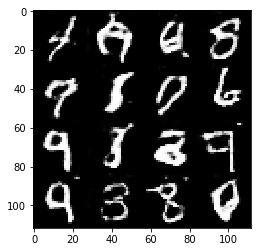

Epoch 2/2       Disc. Loss: 0.7468       Gen. Loss: 1.2815
Epoch 2/2       Disc. Loss: 0.7099       Gen. Loss: 1.7565
Epoch 2/2       Disc. Loss: 0.6350       Gen. Loss: 2.2499
Epoch 2/2       Disc. Loss: 0.9389       Gen. Loss: 0.9572
Epoch 2/2       Disc. Loss: 0.9447       Gen. Loss: 0.9613
Epoch 2/2       Disc. Loss: 1.2123       Gen. Loss: 0.6798
Epoch 2/2       Disc. Loss: 0.9202       Gen. Loss: 1.0332
Epoch 2/2       Disc. Loss: 0.6048       Gen. Loss: 2.3349
Epoch 2/2       Disc. Loss: 0.6622       Gen. Loss: 1.4777
Epoch 2/2       Disc. Loss: 1.2915       Gen. Loss: 0.6059


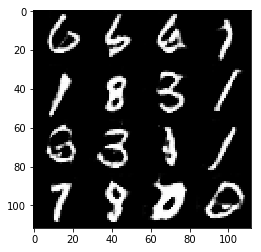

Epoch 2/2       Disc. Loss: 1.0887       Gen. Loss: 0.8026
Epoch 2/2       Disc. Loss: 0.5530       Gen. Loss: 1.9198
Epoch 2/2       Disc. Loss: 0.6677       Gen. Loss: 2.1909
Epoch 2/2       Disc. Loss: 0.8032       Gen. Loss: 2.0631
Epoch 2/2       Disc. Loss: 1.1918       Gen. Loss: 0.7130
Epoch 2/2       Disc. Loss: 1.0576       Gen. Loss: 3.0931
Epoch 2/2       Disc. Loss: 0.6893       Gen. Loss: 1.6174
Epoch 2/2       Disc. Loss: 0.8713       Gen. Loss: 1.1348
Epoch 2/2       Disc. Loss: 0.7527       Gen. Loss: 1.2591
Epoch 2/2       Disc. Loss: 0.9857       Gen. Loss: 0.8861


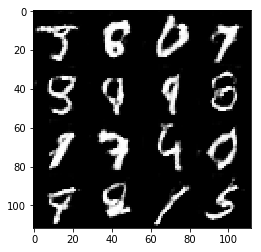

Epoch 2/2       Disc. Loss: 0.6985       Gen. Loss: 1.4645
Epoch 2/2       Disc. Loss: 0.5980       Gen. Loss: 1.7239
Epoch 2/2       Disc. Loss: 0.6213       Gen. Loss: 1.7970
Epoch 2/2       Disc. Loss: 1.0563       Gen. Loss: 0.8665
Epoch 2/2       Disc. Loss: 0.5953       Gen. Loss: 2.1603
Epoch 2/2       Disc. Loss: 0.7859       Gen. Loss: 1.2058
Epoch 2/2       Disc. Loss: 0.8808       Gen. Loss: 2.9654
Epoch 2/2       Disc. Loss: 0.8864       Gen. Loss: 1.0115
Epoch 2/2       Disc. Loss: 0.7660       Gen. Loss: 1.2069
Epoch 2/2       Disc. Loss: 0.7302       Gen. Loss: 1.3484


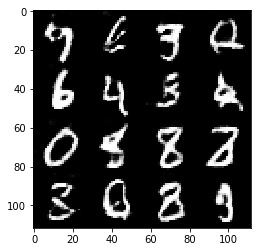

Epoch 2/2       Disc. Loss: 0.8755       Gen. Loss: 1.0042
Epoch 2/2       Disc. Loss: 0.6652       Gen. Loss: 1.4763
Epoch 2/2       Disc. Loss: 0.8077       Gen. Loss: 1.2123
Epoch 2/2       Disc. Loss: 0.5977       Gen. Loss: 1.9152
Epoch 2/2       Disc. Loss: 0.7524       Gen. Loss: 1.4423


In [14]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1       Disc. Loss: 1.9703       Gen. Loss: 0.3068
Epoch 1/1       Disc. Loss: 1.2687       Gen. Loss: 0.6829
Epoch 1/1       Disc. Loss: 0.8347       Gen. Loss: 1.3614
Epoch 1/1       Disc. Loss: 0.8048       Gen. Loss: 1.2342
Epoch 1/1       Disc. Loss: 0.7958       Gen. Loss: 1.4810
Epoch 1/1       Disc. Loss: 0.6360       Gen. Loss: 1.8081
Epoch 1/1       Disc. Loss: 0.5434       Gen. Loss: 2.2068
Epoch 1/1       Disc. Loss: 0.4317       Gen. Loss: 3.7403
Epoch 1/1       Disc. Loss: 0.7576       Gen. Loss: 1.2287
Epoch 1/1       Disc. Loss: 0.5909       Gen. Loss: 2.6785


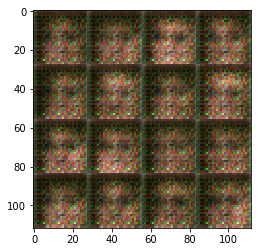

Epoch 1/1       Disc. Loss: 0.8965       Gen. Loss: 1.0774
Epoch 1/1       Disc. Loss: 0.8673       Gen. Loss: 1.0933
Epoch 1/1       Disc. Loss: 0.7635       Gen. Loss: 1.7099
Epoch 1/1       Disc. Loss: 0.7081       Gen. Loss: 1.7579
Epoch 1/1       Disc. Loss: 0.8803       Gen. Loss: 1.0938
Epoch 1/1       Disc. Loss: 0.9370       Gen. Loss: 0.9022
Epoch 1/1       Disc. Loss: 0.8401       Gen. Loss: 1.5674
Epoch 1/1       Disc. Loss: 0.5713       Gen. Loss: 2.4368
Epoch 1/1       Disc. Loss: 0.8314       Gen. Loss: 2.0330
Epoch 1/1       Disc. Loss: 0.7640       Gen. Loss: 1.9759


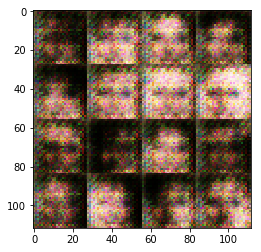

Epoch 1/1       Disc. Loss: 1.2738       Gen. Loss: 0.6612
Epoch 1/1       Disc. Loss: 0.9593       Gen. Loss: 1.0222
Epoch 1/1       Disc. Loss: 0.8464       Gen. Loss: 1.4583
Epoch 1/1       Disc. Loss: 0.8069       Gen. Loss: 1.7286
Epoch 1/1       Disc. Loss: 0.7356       Gen. Loss: 1.8216
Epoch 1/1       Disc. Loss: 0.8612       Gen. Loss: 1.1926
Epoch 1/1       Disc. Loss: 1.1581       Gen. Loss: 0.8395
Epoch 1/1       Disc. Loss: 1.0558       Gen. Loss: 0.9441
Epoch 1/1       Disc. Loss: 0.8342       Gen. Loss: 1.6119
Epoch 1/1       Disc. Loss: 0.8489       Gen. Loss: 1.8330


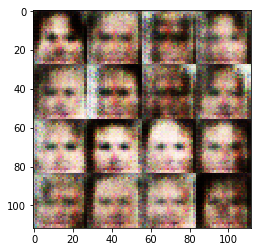

Epoch 1/1       Disc. Loss: 1.7048       Gen. Loss: 0.3901
Epoch 1/1       Disc. Loss: 0.9256       Gen. Loss: 1.1229
Epoch 1/1       Disc. Loss: 0.8351       Gen. Loss: 1.2600
Epoch 1/1       Disc. Loss: 0.8155       Gen. Loss: 1.4291
Epoch 1/1       Disc. Loss: 1.3353       Gen. Loss: 0.7138
Epoch 1/1       Disc. Loss: 0.8699       Gen. Loss: 1.2473
Epoch 1/1       Disc. Loss: 1.1334       Gen. Loss: 1.0376
Epoch 1/1       Disc. Loss: 1.1303       Gen. Loss: 0.8119
Epoch 1/1       Disc. Loss: 1.8145       Gen. Loss: 0.3325
Epoch 1/1       Disc. Loss: 0.9523       Gen. Loss: 1.0469


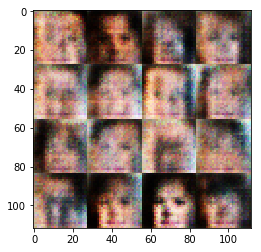

Epoch 1/1       Disc. Loss: 0.7855       Gen. Loss: 1.3499
Epoch 1/1       Disc. Loss: 0.9258       Gen. Loss: 1.1588
Epoch 1/1       Disc. Loss: 0.9513       Gen. Loss: 1.2472
Epoch 1/1       Disc. Loss: 0.8960       Gen. Loss: 1.8234
Epoch 1/1       Disc. Loss: 1.1276       Gen. Loss: 1.2603
Epoch 1/1       Disc. Loss: 1.1563       Gen. Loss: 0.7689
Epoch 1/1       Disc. Loss: 1.2679       Gen. Loss: 0.6336
Epoch 1/1       Disc. Loss: 1.0937       Gen. Loss: 0.8084
Epoch 1/1       Disc. Loss: 1.1551       Gen. Loss: 0.8007
Epoch 1/1       Disc. Loss: 1.6479       Gen. Loss: 0.4013


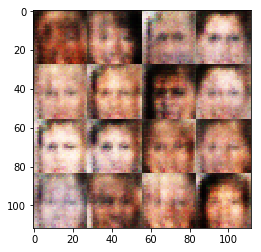

Epoch 1/1       Disc. Loss: 1.2748       Gen. Loss: 0.8705
Epoch 1/1       Disc. Loss: 0.8449       Gen. Loss: 1.4132
Epoch 1/1       Disc. Loss: 0.8967       Gen. Loss: 1.7143
Epoch 1/1       Disc. Loss: 1.0904       Gen. Loss: 0.9703
Epoch 1/1       Disc. Loss: 0.8538       Gen. Loss: 1.6254
Epoch 1/1       Disc. Loss: 1.2062       Gen. Loss: 0.7377
Epoch 1/1       Disc. Loss: 1.0062       Gen. Loss: 0.9615
Epoch 1/1       Disc. Loss: 1.0102       Gen. Loss: 0.9526
Epoch 1/1       Disc. Loss: 0.7160       Gen. Loss: 1.8530
Epoch 1/1       Disc. Loss: 1.2287       Gen. Loss: 0.8080


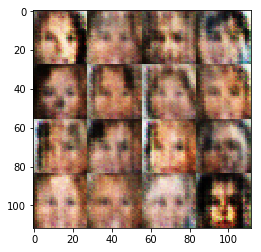

Epoch 1/1       Disc. Loss: 1.0355       Gen. Loss: 2.0833
Epoch 1/1       Disc. Loss: 1.1447       Gen. Loss: 1.1005
Epoch 1/1       Disc. Loss: 1.2755       Gen. Loss: 0.7066
Epoch 1/1       Disc. Loss: 1.1629       Gen. Loss: 1.0354
Epoch 1/1       Disc. Loss: 0.8592       Gen. Loss: 1.2264
Epoch 1/1       Disc. Loss: 1.0399       Gen. Loss: 1.2248
Epoch 1/1       Disc. Loss: 1.0625       Gen. Loss: 0.9021
Epoch 1/1       Disc. Loss: 1.1275       Gen. Loss: 1.1735
Epoch 1/1       Disc. Loss: 1.1063       Gen. Loss: 1.1407
Epoch 1/1       Disc. Loss: 1.2123       Gen. Loss: 0.9501


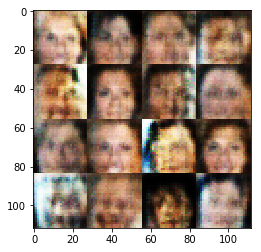

Epoch 1/1       Disc. Loss: 0.9962       Gen. Loss: 1.5758
Epoch 1/1       Disc. Loss: 1.0339       Gen. Loss: 1.1454
Epoch 1/1       Disc. Loss: 1.1324       Gen. Loss: 0.9281
Epoch 1/1       Disc. Loss: 1.0311       Gen. Loss: 0.9054
Epoch 1/1       Disc. Loss: 0.9358       Gen. Loss: 1.2472
Epoch 1/1       Disc. Loss: 1.1428       Gen. Loss: 0.8314
Epoch 1/1       Disc. Loss: 1.2212       Gen. Loss: 0.7825
Epoch 1/1       Disc. Loss: 1.1101       Gen. Loss: 0.9463
Epoch 1/1       Disc. Loss: 1.0277       Gen. Loss: 1.1039
Epoch 1/1       Disc. Loss: 1.2577       Gen. Loss: 0.7508


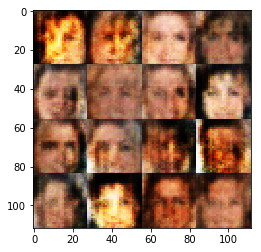

Epoch 1/1       Disc. Loss: 1.0254       Gen. Loss: 1.1608
Epoch 1/1       Disc. Loss: 1.1161       Gen. Loss: 1.0034
Epoch 1/1       Disc. Loss: 1.3373       Gen. Loss: 0.6749
Epoch 1/1       Disc. Loss: 0.9144       Gen. Loss: 1.2799
Epoch 1/1       Disc. Loss: 1.1099       Gen. Loss: 0.9020
Epoch 1/1       Disc. Loss: 1.0473       Gen. Loss: 0.9529
Epoch 1/1       Disc. Loss: 1.1591       Gen. Loss: 0.8925
Epoch 1/1       Disc. Loss: 1.0784       Gen. Loss: 1.2122
Epoch 1/1       Disc. Loss: 1.2226       Gen. Loss: 0.9201
Epoch 1/1       Disc. Loss: 0.9328       Gen. Loss: 1.4224


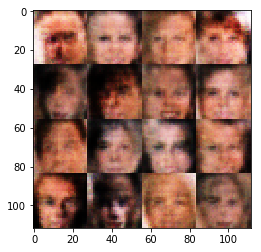

Epoch 1/1       Disc. Loss: 1.2862       Gen. Loss: 0.7386
Epoch 1/1       Disc. Loss: 0.9800       Gen. Loss: 1.1748
Epoch 1/1       Disc. Loss: 1.1131       Gen. Loss: 1.1410
Epoch 1/1       Disc. Loss: 1.2996       Gen. Loss: 1.0042
Epoch 1/1       Disc. Loss: 1.0529       Gen. Loss: 1.1959
Epoch 1/1       Disc. Loss: 1.0571       Gen. Loss: 1.1632
Epoch 1/1       Disc. Loss: 1.0325       Gen. Loss: 1.0688
Epoch 1/1       Disc. Loss: 1.3262       Gen. Loss: 0.6259
Epoch 1/1       Disc. Loss: 1.0545       Gen. Loss: 1.0561
Epoch 1/1       Disc. Loss: 1.1127       Gen. Loss: 0.8392


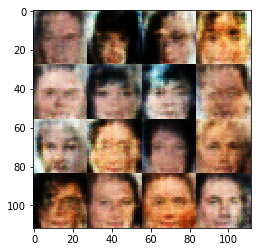

Epoch 1/1       Disc. Loss: 1.1875       Gen. Loss: 1.2217
Epoch 1/1       Disc. Loss: 1.3146       Gen. Loss: 0.7675
Epoch 1/1       Disc. Loss: 1.0841       Gen. Loss: 1.1932
Epoch 1/1       Disc. Loss: 0.9494       Gen. Loss: 1.2956
Epoch 1/1       Disc. Loss: 1.0142       Gen. Loss: 1.1624
Epoch 1/1       Disc. Loss: 1.1683       Gen. Loss: 0.7628
Epoch 1/1       Disc. Loss: 1.1627       Gen. Loss: 0.7459
Epoch 1/1       Disc. Loss: 1.0912       Gen. Loss: 0.9680
Epoch 1/1       Disc. Loss: 1.0547       Gen. Loss: 0.9184
Epoch 1/1       Disc. Loss: 0.9601       Gen. Loss: 1.4493


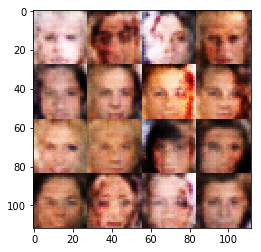

Epoch 1/1       Disc. Loss: 1.1997       Gen. Loss: 1.0048
Epoch 1/1       Disc. Loss: 1.1869       Gen. Loss: 1.0077
Epoch 1/1       Disc. Loss: 1.1005       Gen. Loss: 0.8445
Epoch 1/1       Disc. Loss: 1.3857       Gen. Loss: 0.6622
Epoch 1/1       Disc. Loss: 1.0193       Gen. Loss: 0.8514
Epoch 1/1       Disc. Loss: 1.5712       Gen. Loss: 0.4443
Epoch 1/1       Disc. Loss: 1.1915       Gen. Loss: 1.0989
Epoch 1/1       Disc. Loss: 1.1689       Gen. Loss: 1.1727
Epoch 1/1       Disc. Loss: 1.1229       Gen. Loss: 0.8248
Epoch 1/1       Disc. Loss: 1.3054       Gen. Loss: 0.8975


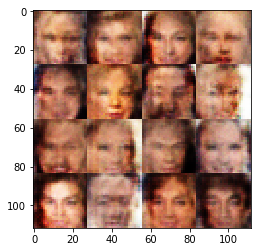

Epoch 1/1       Disc. Loss: 1.1160       Gen. Loss: 0.8582
Epoch 1/1       Disc. Loss: 1.0166       Gen. Loss: 1.1117
Epoch 1/1       Disc. Loss: 1.1920       Gen. Loss: 0.8276
Epoch 1/1       Disc. Loss: 0.9668       Gen. Loss: 1.1673
Epoch 1/1       Disc. Loss: 1.1411       Gen. Loss: 0.8926
Epoch 1/1       Disc. Loss: 1.0865       Gen. Loss: 0.8520
Epoch 1/1       Disc. Loss: 1.1540       Gen. Loss: 1.2180
Epoch 1/1       Disc. Loss: 1.0888       Gen. Loss: 0.9574
Epoch 1/1       Disc. Loss: 1.1289       Gen. Loss: 1.0624
Epoch 1/1       Disc. Loss: 1.3411       Gen. Loss: 0.8162


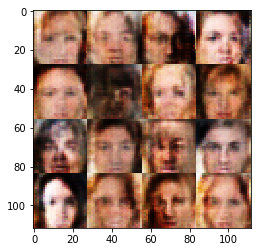

Epoch 1/1       Disc. Loss: 1.1368       Gen. Loss: 0.9430
Epoch 1/1       Disc. Loss: 1.0077       Gen. Loss: 1.4614
Epoch 1/1       Disc. Loss: 1.0489       Gen. Loss: 1.1129
Epoch 1/1       Disc. Loss: 1.1840       Gen. Loss: 0.9831
Epoch 1/1       Disc. Loss: 1.1438       Gen. Loss: 1.2595
Epoch 1/1       Disc. Loss: 1.2463       Gen. Loss: 1.0713
Epoch 1/1       Disc. Loss: 1.1968       Gen. Loss: 1.0204
Epoch 1/1       Disc. Loss: 1.2445       Gen. Loss: 0.8305
Epoch 1/1       Disc. Loss: 1.1028       Gen. Loss: 0.9521
Epoch 1/1       Disc. Loss: 1.0540       Gen. Loss: 1.1705


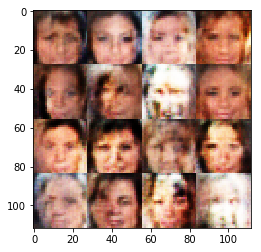

Epoch 1/1       Disc. Loss: 1.0413       Gen. Loss: 0.9795
Epoch 1/1       Disc. Loss: 1.3894       Gen. Loss: 0.6806
Epoch 1/1       Disc. Loss: 1.1459       Gen. Loss: 1.1140
Epoch 1/1       Disc. Loss: 1.0947       Gen. Loss: 1.1726
Epoch 1/1       Disc. Loss: 1.1818       Gen. Loss: 0.9709
Epoch 1/1       Disc. Loss: 1.0077       Gen. Loss: 1.5603
Epoch 1/1       Disc. Loss: 1.1253       Gen. Loss: 0.9623
Epoch 1/1       Disc. Loss: 1.1515       Gen. Loss: 0.8606
Epoch 1/1       Disc. Loss: 1.0929       Gen. Loss: 0.9663
Epoch 1/1       Disc. Loss: 1.0278       Gen. Loss: 1.1726


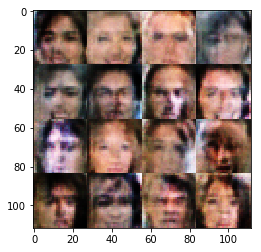

Epoch 1/1       Disc. Loss: 1.1953       Gen. Loss: 0.8084
Epoch 1/1       Disc. Loss: 1.1407       Gen. Loss: 0.9451
Epoch 1/1       Disc. Loss: 0.9002       Gen. Loss: 1.1895
Epoch 1/1       Disc. Loss: 1.1907       Gen. Loss: 0.9507
Epoch 1/1       Disc. Loss: 1.1592       Gen. Loss: 0.8945
Epoch 1/1       Disc. Loss: 1.1735       Gen. Loss: 0.9198
Epoch 1/1       Disc. Loss: 1.1913       Gen. Loss: 0.8193
Epoch 1/1       Disc. Loss: 1.1291       Gen. Loss: 0.8686
Epoch 1/1       Disc. Loss: 1.0055       Gen. Loss: 1.1409
Epoch 1/1       Disc. Loss: 1.1551       Gen. Loss: 0.8294


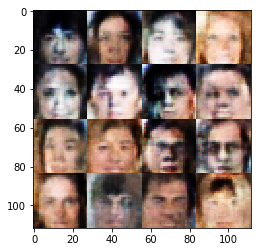

Epoch 1/1       Disc. Loss: 1.3920       Gen. Loss: 0.5557
Epoch 1/1       Disc. Loss: 1.0238       Gen. Loss: 1.0394
Epoch 1/1       Disc. Loss: 1.1909       Gen. Loss: 0.7489
Epoch 1/1       Disc. Loss: 1.0839       Gen. Loss: 1.1712
Epoch 1/1       Disc. Loss: 1.2512       Gen. Loss: 0.8197
Epoch 1/1       Disc. Loss: 1.0026       Gen. Loss: 1.4399
Epoch 1/1       Disc. Loss: 1.1287       Gen. Loss: 0.7988
Epoch 1/1       Disc. Loss: 1.0739       Gen. Loss: 1.1342
Epoch 1/1       Disc. Loss: 1.1114       Gen. Loss: 1.0806
Epoch 1/1       Disc. Loss: 1.0585       Gen. Loss: 0.9713


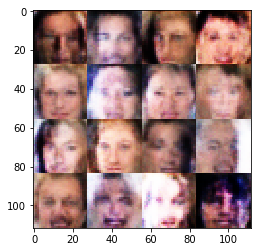

Epoch 1/1       Disc. Loss: 1.1819       Gen. Loss: 0.7242
Epoch 1/1       Disc. Loss: 1.1643       Gen. Loss: 0.8154
Epoch 1/1       Disc. Loss: 1.1010       Gen. Loss: 1.1789
Epoch 1/1       Disc. Loss: 1.1226       Gen. Loss: 0.9748
Epoch 1/1       Disc. Loss: 0.9861       Gen. Loss: 1.0132
Epoch 1/1       Disc. Loss: 1.1251       Gen. Loss: 0.7394
Epoch 1/1       Disc. Loss: 1.4082       Gen. Loss: 0.5315
Epoch 1/1       Disc. Loss: 1.0436       Gen. Loss: 0.9749
Epoch 1/1       Disc. Loss: 1.3107       Gen. Loss: 0.8094
Epoch 1/1       Disc. Loss: 1.1251       Gen. Loss: 0.8165


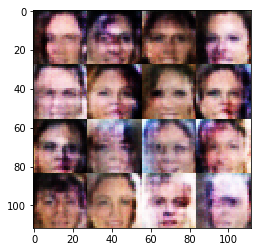

Epoch 1/1       Disc. Loss: 1.2062       Gen. Loss: 0.9398
Epoch 1/1       Disc. Loss: 1.1393       Gen. Loss: 0.7766
Epoch 1/1       Disc. Loss: 1.2850       Gen. Loss: 0.7338
Epoch 1/1       Disc. Loss: 1.1881       Gen. Loss: 0.8971
Epoch 1/1       Disc. Loss: 1.1105       Gen. Loss: 0.8444
Epoch 1/1       Disc. Loss: 1.1479       Gen. Loss: 0.7673
Epoch 1/1       Disc. Loss: 1.1857       Gen. Loss: 0.7519
Epoch 1/1       Disc. Loss: 1.0640       Gen. Loss: 0.9046
Epoch 1/1       Disc. Loss: 1.3383       Gen. Loss: 0.7439
Epoch 1/1       Disc. Loss: 1.1634       Gen. Loss: 0.8614


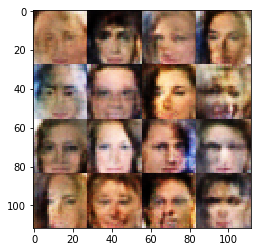

Epoch 1/1       Disc. Loss: 1.0333       Gen. Loss: 0.9392
Epoch 1/1       Disc. Loss: 1.1145       Gen. Loss: 0.8971
Epoch 1/1       Disc. Loss: 1.1858       Gen. Loss: 0.7447
Epoch 1/1       Disc. Loss: 1.1626       Gen. Loss: 0.6875
Epoch 1/1       Disc. Loss: 1.0327       Gen. Loss: 0.9612
Epoch 1/1       Disc. Loss: 1.1860       Gen. Loss: 1.5165
Epoch 1/1       Disc. Loss: 1.1598       Gen. Loss: 0.7995
Epoch 1/1       Disc. Loss: 1.0697       Gen. Loss: 0.8841
Epoch 1/1       Disc. Loss: 1.0326       Gen. Loss: 1.0912
Epoch 1/1       Disc. Loss: 1.2878       Gen. Loss: 0.7996


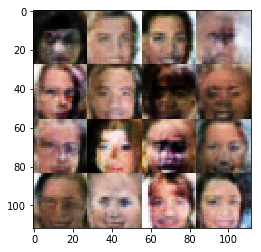

Epoch 1/1       Disc. Loss: 1.0122       Gen. Loss: 1.0098
Epoch 1/1       Disc. Loss: 0.9622       Gen. Loss: 1.4542
Epoch 1/1       Disc. Loss: 1.0490       Gen. Loss: 0.9232
Epoch 1/1       Disc. Loss: 1.2098       Gen. Loss: 0.7128
Epoch 1/1       Disc. Loss: 1.4788       Gen. Loss: 1.2771
Epoch 1/1       Disc. Loss: 1.2008       Gen. Loss: 0.7394
Epoch 1/1       Disc. Loss: 1.0737       Gen. Loss: 1.0311
Epoch 1/1       Disc. Loss: 1.0697       Gen. Loss: 0.8853
Epoch 1/1       Disc. Loss: 1.0485       Gen. Loss: 0.9954
Epoch 1/1       Disc. Loss: 0.9653       Gen. Loss: 0.9938


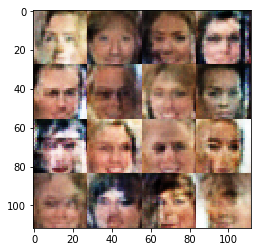

Epoch 1/1       Disc. Loss: 1.2370       Gen. Loss: 0.6445
Epoch 1/1       Disc. Loss: 1.2768       Gen. Loss: 0.9355
Epoch 1/1       Disc. Loss: 1.1958       Gen. Loss: 0.9652
Epoch 1/1       Disc. Loss: 1.0901       Gen. Loss: 1.2109
Epoch 1/1       Disc. Loss: 1.0737       Gen. Loss: 0.9544
Epoch 1/1       Disc. Loss: 1.1672       Gen. Loss: 1.3143
Epoch 1/1       Disc. Loss: 1.0828       Gen. Loss: 1.5396
Epoch 1/1       Disc. Loss: 1.1718       Gen. Loss: 0.8667
Epoch 1/1       Disc. Loss: 1.0262       Gen. Loss: 0.9814
Epoch 1/1       Disc. Loss: 1.2236       Gen. Loss: 0.9921


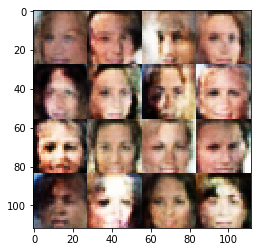

Epoch 1/1       Disc. Loss: 1.3288       Gen. Loss: 0.6474
Epoch 1/1       Disc. Loss: 1.2452       Gen. Loss: 1.0984
Epoch 1/1       Disc. Loss: 1.1634       Gen. Loss: 0.7334
Epoch 1/1       Disc. Loss: 1.2208       Gen. Loss: 0.8640
Epoch 1/1       Disc. Loss: 1.2183       Gen. Loss: 0.8066
Epoch 1/1       Disc. Loss: 1.2666       Gen. Loss: 0.6493
Epoch 1/1       Disc. Loss: 1.2544       Gen. Loss: 0.7520
Epoch 1/1       Disc. Loss: 1.2362       Gen. Loss: 0.8702
Epoch 1/1       Disc. Loss: 1.1791       Gen. Loss: 0.7292
Epoch 1/1       Disc. Loss: 1.0552       Gen. Loss: 1.0492


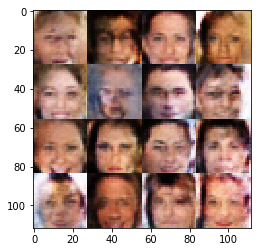

Epoch 1/1       Disc. Loss: 1.0724       Gen. Loss: 0.8870
Epoch 1/1       Disc. Loss: 1.0356       Gen. Loss: 0.8935
Epoch 1/1       Disc. Loss: 1.1103       Gen. Loss: 1.1707
Epoch 1/1       Disc. Loss: 1.2458       Gen. Loss: 0.6942
Epoch 1/1       Disc. Loss: 1.3282       Gen. Loss: 0.6563
Epoch 1/1       Disc. Loss: 1.2669       Gen. Loss: 1.5976
Epoch 1/1       Disc. Loss: 1.2182       Gen. Loss: 1.3040
Epoch 1/1       Disc. Loss: 1.0814       Gen. Loss: 0.9928
Epoch 1/1       Disc. Loss: 0.9930       Gen. Loss: 1.1227
Epoch 1/1       Disc. Loss: 1.1173       Gen. Loss: 0.9087


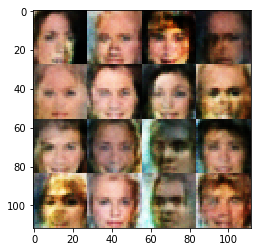

Epoch 1/1       Disc. Loss: 1.0370       Gen. Loss: 1.4529
Epoch 1/1       Disc. Loss: 1.0909       Gen. Loss: 1.0901
Epoch 1/1       Disc. Loss: 1.0788       Gen. Loss: 0.9066
Epoch 1/1       Disc. Loss: 1.2132       Gen. Loss: 0.8869
Epoch 1/1       Disc. Loss: 1.1945       Gen. Loss: 0.6822
Epoch 1/1       Disc. Loss: 1.1348       Gen. Loss: 0.7639
Epoch 1/1       Disc. Loss: 1.1758       Gen. Loss: 0.9922
Epoch 1/1       Disc. Loss: 1.2745       Gen. Loss: 0.6777
Epoch 1/1       Disc. Loss: 1.2245       Gen. Loss: 0.7814
Epoch 1/1       Disc. Loss: 1.1539       Gen. Loss: 0.7576


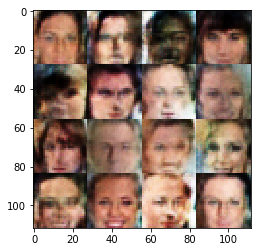

Epoch 1/1       Disc. Loss: 1.4563       Gen. Loss: 0.4953
Epoch 1/1       Disc. Loss: 1.4690       Gen. Loss: 0.4967
Epoch 1/1       Disc. Loss: 0.9554       Gen. Loss: 1.1610
Epoch 1/1       Disc. Loss: 1.0647       Gen. Loss: 1.0721
Epoch 1/1       Disc. Loss: 1.0363       Gen. Loss: 0.9921
Epoch 1/1       Disc. Loss: 1.2128       Gen. Loss: 0.6606
Epoch 1/1       Disc. Loss: 1.3058       Gen. Loss: 0.6344
Epoch 1/1       Disc. Loss: 1.2203       Gen. Loss: 0.7338
Epoch 1/1       Disc. Loss: 1.0530       Gen. Loss: 0.9447
Epoch 1/1       Disc. Loss: 1.1673       Gen. Loss: 0.7893


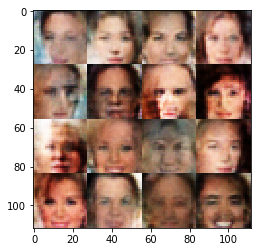

Epoch 1/1       Disc. Loss: 1.2119       Gen. Loss: 0.8089
Epoch 1/1       Disc. Loss: 1.0054       Gen. Loss: 1.0129
Epoch 1/1       Disc. Loss: 1.1431       Gen. Loss: 0.9863
Epoch 1/1       Disc. Loss: 1.1669       Gen. Loss: 0.8857
Epoch 1/1       Disc. Loss: 1.3933       Gen. Loss: 0.5194
Epoch 1/1       Disc. Loss: 1.1559       Gen. Loss: 0.7346
Epoch 1/1       Disc. Loss: 1.1526       Gen. Loss: 0.9085
Epoch 1/1       Disc. Loss: 1.3489       Gen. Loss: 0.8066
Epoch 1/1       Disc. Loss: 1.1758       Gen. Loss: 1.2509
Epoch 1/1       Disc. Loss: 1.1150       Gen. Loss: 0.9953


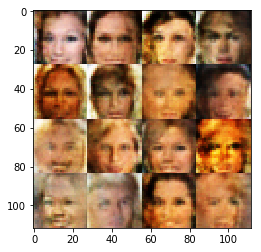

Epoch 1/1       Disc. Loss: 1.1953       Gen. Loss: 0.7867
Epoch 1/1       Disc. Loss: 1.0004       Gen. Loss: 1.0794
Epoch 1/1       Disc. Loss: 0.9384       Gen. Loss: 1.2512
Epoch 1/1       Disc. Loss: 1.0927       Gen. Loss: 0.9065
Epoch 1/1       Disc. Loss: 1.2187       Gen. Loss: 0.7055
Epoch 1/1       Disc. Loss: 1.4313       Gen. Loss: 0.5677
Epoch 1/1       Disc. Loss: 1.3214       Gen. Loss: 0.6714
Epoch 1/1       Disc. Loss: 1.2154       Gen. Loss: 0.8028
Epoch 1/1       Disc. Loss: 1.0267       Gen. Loss: 1.1884
Epoch 1/1       Disc. Loss: 1.2977       Gen. Loss: 0.7806


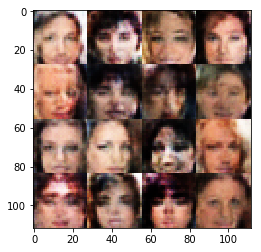

Epoch 1/1       Disc. Loss: 1.2000       Gen. Loss: 0.7529
Epoch 1/1       Disc. Loss: 1.0579       Gen. Loss: 0.9964
Epoch 1/1       Disc. Loss: 1.2219       Gen. Loss: 0.7782
Epoch 1/1       Disc. Loss: 1.3570       Gen. Loss: 0.7369
Epoch 1/1       Disc. Loss: 1.1706       Gen. Loss: 0.8088
Epoch 1/1       Disc. Loss: 1.6284       Gen. Loss: 0.5062
Epoch 1/1       Disc. Loss: 1.2266       Gen. Loss: 0.7531
Epoch 1/1       Disc. Loss: 1.0612       Gen. Loss: 0.9904
Epoch 1/1       Disc. Loss: 1.2617       Gen. Loss: 0.6727
Epoch 1/1       Disc. Loss: 1.1239       Gen. Loss: 0.8869


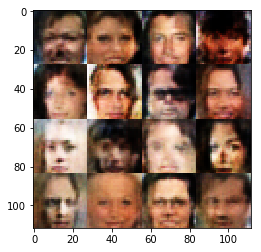

Epoch 1/1       Disc. Loss: 1.3186       Gen. Loss: 0.5890
Epoch 1/1       Disc. Loss: 1.0346       Gen. Loss: 0.9826
Epoch 1/1       Disc. Loss: 1.3317       Gen. Loss: 0.5772
Epoch 1/1       Disc. Loss: 1.2194       Gen. Loss: 0.7294
Epoch 1/1       Disc. Loss: 1.2903       Gen. Loss: 0.6807
Epoch 1/1       Disc. Loss: 1.0044       Gen. Loss: 1.1841
Epoch 1/1       Disc. Loss: 0.9919       Gen. Loss: 1.1616
Epoch 1/1       Disc. Loss: 0.9754       Gen. Loss: 1.0934
Epoch 1/1       Disc. Loss: 1.3485       Gen. Loss: 0.6596
Epoch 1/1       Disc. Loss: 0.9824       Gen. Loss: 1.3205


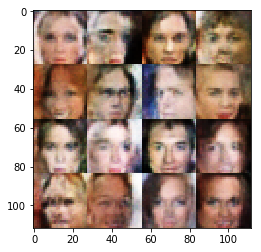

Epoch 1/1       Disc. Loss: 1.0744       Gen. Loss: 0.9202
Epoch 1/1       Disc. Loss: 1.1164       Gen. Loss: 1.0292
Epoch 1/1       Disc. Loss: 0.9905       Gen. Loss: 1.1457
Epoch 1/1       Disc. Loss: 1.0896       Gen. Loss: 0.9637
Epoch 1/1       Disc. Loss: 1.2783       Gen. Loss: 0.6306
Epoch 1/1       Disc. Loss: 1.0926       Gen. Loss: 0.9735
Epoch 1/1       Disc. Loss: 1.0819       Gen. Loss: 1.0137
Epoch 1/1       Disc. Loss: 1.0159       Gen. Loss: 1.0765
Epoch 1/1       Disc. Loss: 0.9852       Gen. Loss: 0.9517
Epoch 1/1       Disc. Loss: 0.9938       Gen. Loss: 1.0679


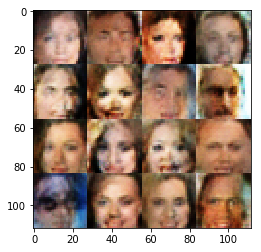

Epoch 1/1       Disc. Loss: 1.2893       Gen. Loss: 0.6491
Epoch 1/1       Disc. Loss: 1.0821       Gen. Loss: 0.8751
Epoch 1/1       Disc. Loss: 1.3577       Gen. Loss: 0.5985
Epoch 1/1       Disc. Loss: 1.1951       Gen. Loss: 0.7743
Epoch 1/1       Disc. Loss: 1.3673       Gen. Loss: 0.6045
Epoch 1/1       Disc. Loss: 1.1124       Gen. Loss: 0.8021
Epoch 1/1       Disc. Loss: 1.0415       Gen. Loss: 0.9734
Epoch 1/1       Disc. Loss: 1.1116       Gen. Loss: 0.8344
Epoch 1/1       Disc. Loss: 1.0590       Gen. Loss: 1.0879
Epoch 1/1       Disc. Loss: 1.0685       Gen. Loss: 1.0545


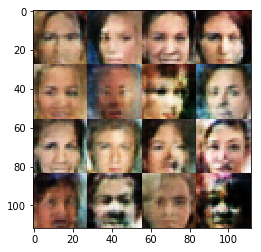

Epoch 1/1       Disc. Loss: 1.2483       Gen. Loss: 0.6683
Epoch 1/1       Disc. Loss: 1.1537       Gen. Loss: 0.8319
Epoch 1/1       Disc. Loss: 1.2753       Gen. Loss: 0.6991
Epoch 1/1       Disc. Loss: 1.3372       Gen. Loss: 0.6864
Epoch 1/1       Disc. Loss: 1.1495       Gen. Loss: 0.8302
Epoch 1/1       Disc. Loss: 0.9856       Gen. Loss: 0.9068
Epoch 1/1       Disc. Loss: 1.0600       Gen. Loss: 0.8632
Epoch 1/1       Disc. Loss: 1.2107       Gen. Loss: 0.8242
Epoch 1/1       Disc. Loss: 1.0443       Gen. Loss: 0.9326
Epoch 1/1       Disc. Loss: 1.2566       Gen. Loss: 1.1411


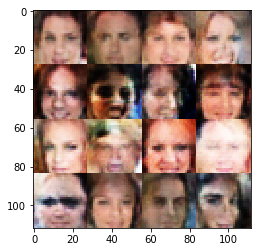

Epoch 1/1       Disc. Loss: 1.1735       Gen. Loss: 1.1182
Epoch 1/1       Disc. Loss: 1.1208       Gen. Loss: 0.8925
Epoch 1/1       Disc. Loss: 1.2311       Gen. Loss: 0.7467
Epoch 1/1       Disc. Loss: 1.0037       Gen. Loss: 1.2677
Epoch 1/1       Disc. Loss: 1.2953       Gen. Loss: 0.5865
Epoch 1/1       Disc. Loss: 1.1289       Gen. Loss: 0.7380
Epoch 1/1       Disc. Loss: 1.1730       Gen. Loss: 1.0611
Epoch 1/1       Disc. Loss: 1.3758       Gen. Loss: 0.6616
Epoch 1/1       Disc. Loss: 1.1647       Gen. Loss: 0.7669
Epoch 1/1       Disc. Loss: 0.9898       Gen. Loss: 0.9936


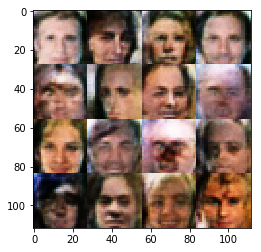

Epoch 1/1       Disc. Loss: 1.1369       Gen. Loss: 1.0446
Epoch 1/1       Disc. Loss: 1.2446       Gen. Loss: 0.9539
Epoch 1/1       Disc. Loss: 1.0225       Gen. Loss: 1.1707
Epoch 1/1       Disc. Loss: 1.2026       Gen. Loss: 0.7301
Epoch 1/1       Disc. Loss: 1.1744       Gen. Loss: 0.7939
Epoch 1/1       Disc. Loss: 1.0735       Gen. Loss: 1.2939
Epoch 1/1       Disc. Loss: 1.1798       Gen. Loss: 0.8779
Epoch 1/1       Disc. Loss: 1.3056       Gen. Loss: 0.7500
Epoch 1/1       Disc. Loss: 1.0554       Gen. Loss: 1.6781
Epoch 1/1       Disc. Loss: 1.0994       Gen. Loss: 0.8570


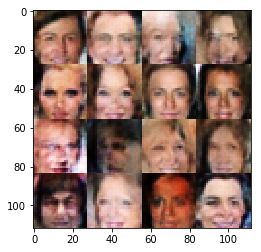

Epoch 1/1       Disc. Loss: 1.4084       Gen. Loss: 0.6506
Epoch 1/1       Disc. Loss: 1.2521       Gen. Loss: 0.6578
Epoch 1/1       Disc. Loss: 1.0129       Gen. Loss: 1.1192
Epoch 1/1       Disc. Loss: 1.2048       Gen. Loss: 0.7235
Epoch 1/1       Disc. Loss: 1.5037       Gen. Loss: 0.6418
Epoch 1/1       Disc. Loss: 1.1083       Gen. Loss: 0.8378
Epoch 1/1       Disc. Loss: 1.1518       Gen. Loss: 0.8172
Epoch 1/1       Disc. Loss: 1.0130       Gen. Loss: 1.0992
Epoch 1/1       Disc. Loss: 1.2760       Gen. Loss: 0.8608
Epoch 1/1       Disc. Loss: 1.2438       Gen. Loss: 0.7015


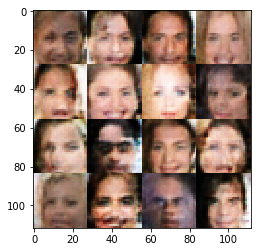

Epoch 1/1       Disc. Loss: 1.2751       Gen. Loss: 0.7205
Epoch 1/1       Disc. Loss: 1.2374       Gen. Loss: 0.6632
Epoch 1/1       Disc. Loss: 1.0410       Gen. Loss: 0.9317
Epoch 1/1       Disc. Loss: 1.1285       Gen. Loss: 0.9048
Epoch 1/1       Disc. Loss: 0.9837       Gen. Loss: 1.2230
Epoch 1/1       Disc. Loss: 1.1545       Gen. Loss: 0.7687
Epoch 1/1       Disc. Loss: 1.0908       Gen. Loss: 0.8886
Epoch 1/1       Disc. Loss: 1.0726       Gen. Loss: 0.9440
Epoch 1/1       Disc. Loss: 1.0149       Gen. Loss: 1.0860
Epoch 1/1       Disc. Loss: 1.1744       Gen. Loss: 0.7838


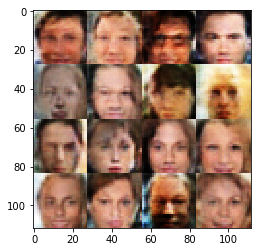

Epoch 1/1       Disc. Loss: 1.2612       Gen. Loss: 0.7278
Epoch 1/1       Disc. Loss: 1.2695       Gen. Loss: 0.7082
Epoch 1/1       Disc. Loss: 1.0530       Gen. Loss: 1.2557
Epoch 1/1       Disc. Loss: 1.2127       Gen. Loss: 0.9142
Epoch 1/1       Disc. Loss: 1.2130       Gen. Loss: 0.7010
Epoch 1/1       Disc. Loss: 1.1879       Gen. Loss: 1.0776
Epoch 1/1       Disc. Loss: 1.0304       Gen. Loss: 1.0284
Epoch 1/1       Disc. Loss: 1.1448       Gen. Loss: 0.7862
Epoch 1/1       Disc. Loss: 0.9087       Gen. Loss: 1.3113
Epoch 1/1       Disc. Loss: 1.2024       Gen. Loss: 0.7057


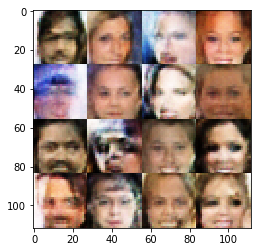

Epoch 1/1       Disc. Loss: 0.9828       Gen. Loss: 1.0792
Epoch 1/1       Disc. Loss: 1.2994       Gen. Loss: 0.6349
Epoch 1/1       Disc. Loss: 1.1042       Gen. Loss: 1.0770
Epoch 1/1       Disc. Loss: 1.2263       Gen. Loss: 0.7939
Epoch 1/1       Disc. Loss: 1.1836       Gen. Loss: 1.0319
Epoch 1/1       Disc. Loss: 1.2133       Gen. Loss: 0.8588
Epoch 1/1       Disc. Loss: 1.0523       Gen. Loss: 0.9982
Epoch 1/1       Disc. Loss: 1.3651       Gen. Loss: 0.8397
Epoch 1/1       Disc. Loss: 0.9098       Gen. Loss: 1.2558
Epoch 1/1       Disc. Loss: 1.0864       Gen. Loss: 1.1705


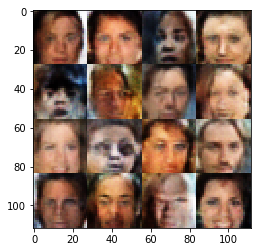

Epoch 1/1       Disc. Loss: 1.2337       Gen. Loss: 0.6719
Epoch 1/1       Disc. Loss: 1.1835       Gen. Loss: 0.7507
Epoch 1/1       Disc. Loss: 1.0136       Gen. Loss: 1.0623
Epoch 1/1       Disc. Loss: 1.2284       Gen. Loss: 0.6091
Epoch 1/1       Disc. Loss: 1.1745       Gen. Loss: 0.8756
Epoch 1/1       Disc. Loss: 1.2269       Gen. Loss: 0.8434
Epoch 1/1       Disc. Loss: 1.1378       Gen. Loss: 0.7417
Epoch 1/1       Disc. Loss: 1.0074       Gen. Loss: 1.4408
Epoch 1/1       Disc. Loss: 1.1918       Gen. Loss: 0.9713
Epoch 1/1       Disc. Loss: 1.3555       Gen. Loss: 0.7013


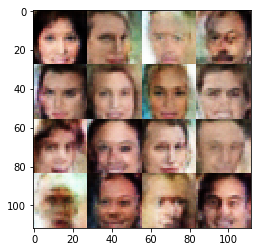

Epoch 1/1       Disc. Loss: 1.1946       Gen. Loss: 0.8422
Epoch 1/1       Disc. Loss: 1.1653       Gen. Loss: 0.9716
Epoch 1/1       Disc. Loss: 1.2436       Gen. Loss: 0.8217
Epoch 1/1       Disc. Loss: 1.2881       Gen. Loss: 0.6406
Epoch 1/1       Disc. Loss: 1.3251       Gen. Loss: 0.7370
Epoch 1/1       Disc. Loss: 1.1677       Gen. Loss: 0.9571
Epoch 1/1       Disc. Loss: 1.0664       Gen. Loss: 0.9267
Epoch 1/1       Disc. Loss: 1.1424       Gen. Loss: 0.8211
Epoch 1/1       Disc. Loss: 1.0891       Gen. Loss: 1.1586
Epoch 1/1       Disc. Loss: 1.1738       Gen. Loss: 0.9729


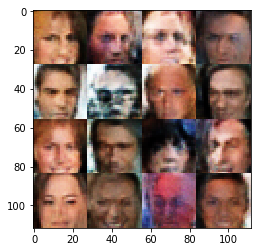

Epoch 1/1       Disc. Loss: 0.9496       Gen. Loss: 1.2300
Epoch 1/1       Disc. Loss: 1.2507       Gen. Loss: 0.7404
Epoch 1/1       Disc. Loss: 1.2267       Gen. Loss: 0.6593
Epoch 1/1       Disc. Loss: 1.0420       Gen. Loss: 1.1505
Epoch 1/1       Disc. Loss: 1.0766       Gen. Loss: 1.2874
Epoch 1/1       Disc. Loss: 1.2223       Gen. Loss: 0.6521
Epoch 1/1       Disc. Loss: 1.2007       Gen. Loss: 0.7787
Epoch 1/1       Disc. Loss: 1.2853       Gen. Loss: 0.7795
Epoch 1/1       Disc. Loss: 0.9987       Gen. Loss: 1.2807
Epoch 1/1       Disc. Loss: 0.9948       Gen. Loss: 1.0767


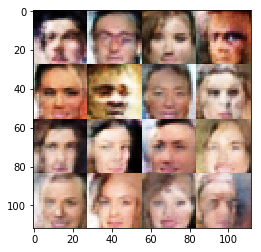

Epoch 1/1       Disc. Loss: 1.2397       Gen. Loss: 1.2689
Epoch 1/1       Disc. Loss: 1.2762       Gen. Loss: 0.7513
Epoch 1/1       Disc. Loss: 0.9932       Gen. Loss: 1.2321
Epoch 1/1       Disc. Loss: 1.1493       Gen. Loss: 0.9002
Epoch 1/1       Disc. Loss: 1.1103       Gen. Loss: 0.9216
Epoch 1/1       Disc. Loss: 1.2722       Gen. Loss: 1.0225
Epoch 1/1       Disc. Loss: 1.3854       Gen. Loss: 0.8062
Epoch 1/1       Disc. Loss: 1.1290       Gen. Loss: 0.8595
Epoch 1/1       Disc. Loss: 1.0556       Gen. Loss: 1.0037
Epoch 1/1       Disc. Loss: 1.1928       Gen. Loss: 0.9525


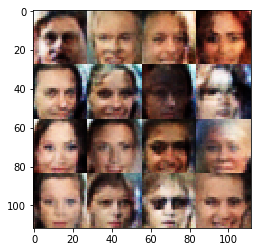

Epoch 1/1       Disc. Loss: 1.3225       Gen. Loss: 0.6867
Epoch 1/1       Disc. Loss: 0.9865       Gen. Loss: 1.5900
Epoch 1/1       Disc. Loss: 1.2902       Gen. Loss: 0.6518
Epoch 1/1       Disc. Loss: 1.1202       Gen. Loss: 0.9611
Epoch 1/1       Disc. Loss: 1.2103       Gen. Loss: 0.8287
Epoch 1/1       Disc. Loss: 1.1238       Gen. Loss: 0.9744
Epoch 1/1       Disc. Loss: 1.1840       Gen. Loss: 0.7814
Epoch 1/1       Disc. Loss: 1.1632       Gen. Loss: 0.9044
Epoch 1/1       Disc. Loss: 1.0082       Gen. Loss: 1.0393
Epoch 1/1       Disc. Loss: 1.0682       Gen. Loss: 0.8601


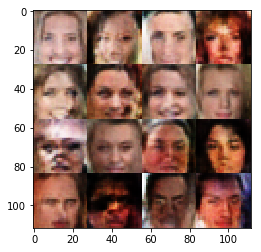

Epoch 1/1       Disc. Loss: 1.0260       Gen. Loss: 0.9835
Epoch 1/1       Disc. Loss: 1.1046       Gen. Loss: 0.8050
Epoch 1/1       Disc. Loss: 1.2092       Gen. Loss: 0.7917
Epoch 1/1       Disc. Loss: 0.8626       Gen. Loss: 1.2148
Epoch 1/1       Disc. Loss: 1.0160       Gen. Loss: 0.9543
Epoch 1/1       Disc. Loss: 1.2238       Gen. Loss: 0.7807
Epoch 1/1       Disc. Loss: 0.9293       Gen. Loss: 1.1525
Epoch 1/1       Disc. Loss: 1.2299       Gen. Loss: 0.8139
Epoch 1/1       Disc. Loss: 1.1903       Gen. Loss: 0.7245
Epoch 1/1       Disc. Loss: 1.4370       Gen. Loss: 0.4930


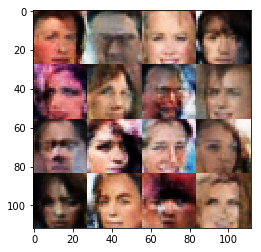

Epoch 1/1       Disc. Loss: 1.0038       Gen. Loss: 1.0185
Epoch 1/1       Disc. Loss: 1.2508       Gen. Loss: 0.6778
Epoch 1/1       Disc. Loss: 1.2083       Gen. Loss: 0.9267
Epoch 1/1       Disc. Loss: 1.0466       Gen. Loss: 1.1096
Epoch 1/1       Disc. Loss: 1.0928       Gen. Loss: 0.9566
Epoch 1/1       Disc. Loss: 0.9745       Gen. Loss: 1.0850
Epoch 1/1       Disc. Loss: 1.0933       Gen. Loss: 0.8803
Epoch 1/1       Disc. Loss: 1.0349       Gen. Loss: 0.9424
Epoch 1/1       Disc. Loss: 1.0096       Gen. Loss: 1.1759
Epoch 1/1       Disc. Loss: 0.8573       Gen. Loss: 1.6872


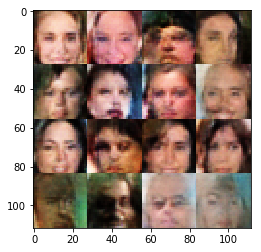

Epoch 1/1       Disc. Loss: 1.2071       Gen. Loss: 0.8445
Epoch 1/1       Disc. Loss: 1.1994       Gen. Loss: 0.8125
Epoch 1/1       Disc. Loss: 1.0688       Gen. Loss: 0.9336
Epoch 1/1       Disc. Loss: 1.0879       Gen. Loss: 0.8894
Epoch 1/1       Disc. Loss: 1.1745       Gen. Loss: 0.7411
Epoch 1/1       Disc. Loss: 0.9744       Gen. Loss: 1.0681
Epoch 1/1       Disc. Loss: 1.5389       Gen. Loss: 0.4869
Epoch 1/1       Disc. Loss: 1.1433       Gen. Loss: 0.7711
Epoch 1/1       Disc. Loss: 1.2982       Gen. Loss: 0.6452
Epoch 1/1       Disc. Loss: 1.4915       Gen. Loss: 0.4622


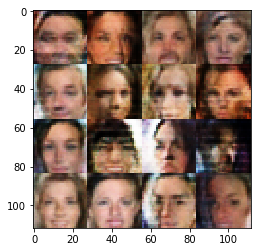

Epoch 1/1       Disc. Loss: 1.2520       Gen. Loss: 0.9663
Epoch 1/1       Disc. Loss: 1.2702       Gen. Loss: 1.1689
Epoch 1/1       Disc. Loss: 1.2438       Gen. Loss: 0.6640
Epoch 1/1       Disc. Loss: 1.8139       Gen. Loss: 0.4418
Epoch 1/1       Disc. Loss: 1.0087       Gen. Loss: 1.0522
Epoch 1/1       Disc. Loss: 1.2349       Gen. Loss: 0.7176
Epoch 1/1       Disc. Loss: 1.1598       Gen. Loss: 0.8348
Epoch 1/1       Disc. Loss: 0.8750       Gen. Loss: 1.2961
Epoch 1/1       Disc. Loss: 1.1804       Gen. Loss: 0.7833
Epoch 1/1       Disc. Loss: 1.3887       Gen. Loss: 0.6958


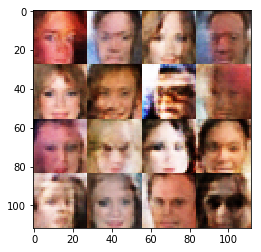

Epoch 1/1       Disc. Loss: 1.2784       Gen. Loss: 0.7482
Epoch 1/1       Disc. Loss: 0.9626       Gen. Loss: 1.3007
Epoch 1/1       Disc. Loss: 1.0841       Gen. Loss: 1.2091
Epoch 1/1       Disc. Loss: 1.1824       Gen. Loss: 0.7581
Epoch 1/1       Disc. Loss: 1.0740       Gen. Loss: 0.8247
Epoch 1/1       Disc. Loss: 1.0691       Gen. Loss: 1.0770
Epoch 1/1       Disc. Loss: 1.1603       Gen. Loss: 0.8999
Epoch 1/1       Disc. Loss: 1.1611       Gen. Loss: 0.8551
Epoch 1/1       Disc. Loss: 1.2367       Gen. Loss: 0.8516
Epoch 1/1       Disc. Loss: 1.0792       Gen. Loss: 1.1245


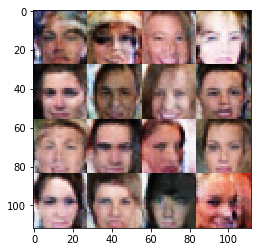

Epoch 1/1       Disc. Loss: 1.1919       Gen. Loss: 0.8324
Epoch 1/1       Disc. Loss: 1.2777       Gen. Loss: 0.7473
Epoch 1/1       Disc. Loss: 1.0688       Gen. Loss: 0.9214
Epoch 1/1       Disc. Loss: 1.2997       Gen. Loss: 0.8428
Epoch 1/1       Disc. Loss: 1.3715       Gen. Loss: 0.5813
Epoch 1/1       Disc. Loss: 1.2300       Gen. Loss: 0.7331
Epoch 1/1       Disc. Loss: 1.1270       Gen. Loss: 0.7640
Epoch 1/1       Disc. Loss: 1.4730       Gen. Loss: 0.4862
Epoch 1/1       Disc. Loss: 1.1284       Gen. Loss: 0.8902
Epoch 1/1       Disc. Loss: 1.1622       Gen. Loss: 1.0937


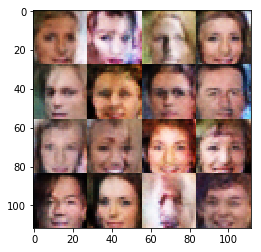

Epoch 1/1       Disc. Loss: 1.0906       Gen. Loss: 0.8692
Epoch 1/1       Disc. Loss: 1.1164       Gen. Loss: 0.8473
Epoch 1/1       Disc. Loss: 1.2748       Gen. Loss: 0.8023
Epoch 1/1       Disc. Loss: 1.1786       Gen. Loss: 0.7341
Epoch 1/1       Disc. Loss: 1.0769       Gen. Loss: 0.8235
Epoch 1/1       Disc. Loss: 1.3412       Gen. Loss: 0.5663
Epoch 1/1       Disc. Loss: 1.0717       Gen. Loss: 1.0842
Epoch 1/1       Disc. Loss: 1.0177       Gen. Loss: 1.1186
Epoch 1/1       Disc. Loss: 1.1569       Gen. Loss: 0.8072
Epoch 1/1       Disc. Loss: 1.3670       Gen. Loss: 0.6410


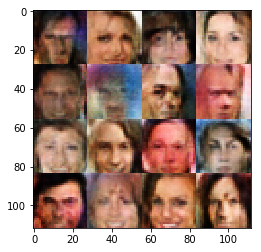

Epoch 1/1       Disc. Loss: 1.2142       Gen. Loss: 0.9944
Epoch 1/1       Disc. Loss: 1.2185       Gen. Loss: 0.9618
Epoch 1/1       Disc. Loss: 1.2468       Gen. Loss: 0.6979
Epoch 1/1       Disc. Loss: 1.2145       Gen. Loss: 0.8155
Epoch 1/1       Disc. Loss: 1.1556       Gen. Loss: 0.8580
Epoch 1/1       Disc. Loss: 1.0292       Gen. Loss: 0.9478
Epoch 1/1       Disc. Loss: 1.3187       Gen. Loss: 0.6770
Epoch 1/1       Disc. Loss: 1.0676       Gen. Loss: 0.9916
Epoch 1/1       Disc. Loss: 1.2202       Gen. Loss: 0.7758
Epoch 1/1       Disc. Loss: 1.5436       Gen. Loss: 0.4610


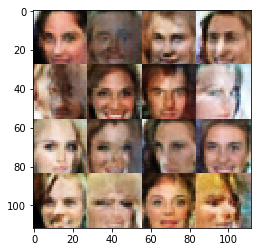

Epoch 1/1       Disc. Loss: 1.4488       Gen. Loss: 0.4938
Epoch 1/1       Disc. Loss: 1.3226       Gen. Loss: 0.5875
Epoch 1/1       Disc. Loss: 1.1237       Gen. Loss: 0.8790
Epoch 1/1       Disc. Loss: 1.3279       Gen. Loss: 0.6226
Epoch 1/1       Disc. Loss: 1.3146       Gen. Loss: 0.6252
Epoch 1/1       Disc. Loss: 1.4285       Gen. Loss: 0.5516
Epoch 1/1       Disc. Loss: 1.2735       Gen. Loss: 0.8078
Epoch 1/1       Disc. Loss: 1.0339       Gen. Loss: 0.9238
Epoch 1/1       Disc. Loss: 1.2950       Gen. Loss: 0.6775
Epoch 1/1       Disc. Loss: 1.0181       Gen. Loss: 1.0922


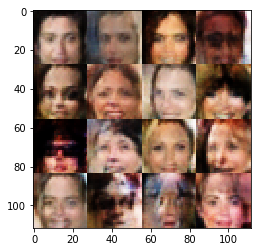

Epoch 1/1       Disc. Loss: 1.3485       Gen. Loss: 0.5745
Epoch 1/1       Disc. Loss: 1.2235       Gen. Loss: 0.7345
Epoch 1/1       Disc. Loss: 1.0819       Gen. Loss: 0.7532
Epoch 1/1       Disc. Loss: 1.2131       Gen. Loss: 0.6846
Epoch 1/1       Disc. Loss: 1.1874       Gen. Loss: 0.8142
Epoch 1/1       Disc. Loss: 1.2698       Gen. Loss: 0.7345
Epoch 1/1       Disc. Loss: 1.2367       Gen. Loss: 0.8174
Epoch 1/1       Disc. Loss: 1.0200       Gen. Loss: 1.0507
Epoch 1/1       Disc. Loss: 1.1532       Gen. Loss: 0.8909
Epoch 1/1       Disc. Loss: 1.0565       Gen. Loss: 1.0780


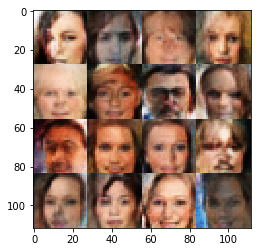

Epoch 1/1       Disc. Loss: 1.2328       Gen. Loss: 0.7607
Epoch 1/1       Disc. Loss: 0.9139       Gen. Loss: 1.1234
Epoch 1/1       Disc. Loss: 1.1658       Gen. Loss: 0.7998
Epoch 1/1       Disc. Loss: 1.2386       Gen. Loss: 0.6857
Epoch 1/1       Disc. Loss: 1.1356       Gen. Loss: 0.8154
Epoch 1/1       Disc. Loss: 1.1194       Gen. Loss: 0.8129
Epoch 1/1       Disc. Loss: 1.0250       Gen. Loss: 1.0781
Epoch 1/1       Disc. Loss: 1.3104       Gen. Loss: 0.6481
Epoch 1/1       Disc. Loss: 1.3376       Gen. Loss: 0.7702
Epoch 1/1       Disc. Loss: 1.2178       Gen. Loss: 0.9426


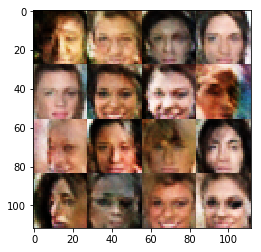

Epoch 1/1       Disc. Loss: 1.2458       Gen. Loss: 0.8025
Epoch 1/1       Disc. Loss: 0.9634       Gen. Loss: 1.1321
Epoch 1/1       Disc. Loss: 0.9884       Gen. Loss: 0.9853
Epoch 1/1       Disc. Loss: 1.2626       Gen. Loss: 0.7723
Epoch 1/1       Disc. Loss: 1.0571       Gen. Loss: 1.0443
Epoch 1/1       Disc. Loss: 1.1790       Gen. Loss: 0.7235
Epoch 1/1       Disc. Loss: 0.9492       Gen. Loss: 0.9482
Epoch 1/1       Disc. Loss: 1.0493       Gen. Loss: 1.0917
Epoch 1/1       Disc. Loss: 1.1991       Gen. Loss: 0.7069
Epoch 1/1       Disc. Loss: 1.1457       Gen. Loss: 0.8275


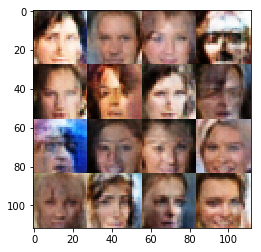

Epoch 1/1       Disc. Loss: 1.2877       Gen. Loss: 0.6423
Epoch 1/1       Disc. Loss: 1.0262       Gen. Loss: 1.0076
Epoch 1/1       Disc. Loss: 1.0619       Gen. Loss: 1.0202
Epoch 1/1       Disc. Loss: 1.0797       Gen. Loss: 0.9284
Epoch 1/1       Disc. Loss: 1.0957       Gen. Loss: 0.8742
Epoch 1/1       Disc. Loss: 0.9012       Gen. Loss: 1.1562
Epoch 1/1       Disc. Loss: 1.3233       Gen. Loss: 0.7647
Epoch 1/1       Disc. Loss: 1.5282       Gen. Loss: 0.4812
Epoch 1/1       Disc. Loss: 1.5047       Gen. Loss: 0.5262
Epoch 1/1       Disc. Loss: 1.2964       Gen. Loss: 0.6943


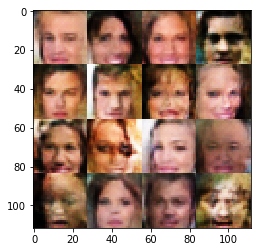

Epoch 1/1       Disc. Loss: 1.3234       Gen. Loss: 0.5969
Epoch 1/1       Disc. Loss: 1.0837       Gen. Loss: 1.0159
Epoch 1/1       Disc. Loss: 1.0057       Gen. Loss: 1.2968
Epoch 1/1       Disc. Loss: 1.1851       Gen. Loss: 0.7929
Epoch 1/1       Disc. Loss: 1.1458       Gen. Loss: 0.8763
Epoch 1/1       Disc. Loss: 1.2354       Gen. Loss: 0.6259
Epoch 1/1       Disc. Loss: 1.1878       Gen. Loss: 0.7972
Epoch 1/1       Disc. Loss: 1.0191       Gen. Loss: 1.1644
Epoch 1/1       Disc. Loss: 1.1095       Gen. Loss: 1.0524
Epoch 1/1       Disc. Loss: 0.9850       Gen. Loss: 1.2691


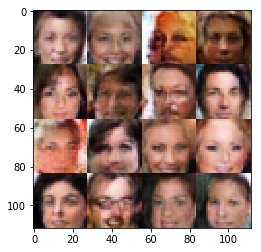

Epoch 1/1       Disc. Loss: 1.5212       Gen. Loss: 0.5078
Epoch 1/1       Disc. Loss: 1.0832       Gen. Loss: 1.1953
Epoch 1/1       Disc. Loss: 1.1355       Gen. Loss: 0.9623
Epoch 1/1       Disc. Loss: 1.1858       Gen. Loss: 0.7675
Epoch 1/1       Disc. Loss: 1.0808       Gen. Loss: 0.9226
Epoch 1/1       Disc. Loss: 1.1483       Gen. Loss: 0.9012
Epoch 1/1       Disc. Loss: 1.1014       Gen. Loss: 1.0752
Epoch 1/1       Disc. Loss: 1.2088       Gen. Loss: 0.7983
Epoch 1/1       Disc. Loss: 1.2676       Gen. Loss: 0.7205
Epoch 1/1       Disc. Loss: 0.9092       Gen. Loss: 1.2284


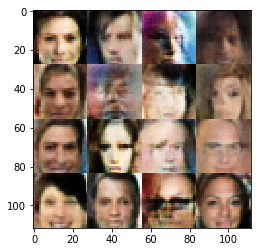

Epoch 1/1       Disc. Loss: 1.1113       Gen. Loss: 0.9243
Epoch 1/1       Disc. Loss: 1.0063       Gen. Loss: 1.0407
Epoch 1/1       Disc. Loss: 1.2426       Gen. Loss: 0.7789
Epoch 1/1       Disc. Loss: 1.3696       Gen. Loss: 0.5723
Epoch 1/1       Disc. Loss: 1.3133       Gen. Loss: 0.6910
Epoch 1/1       Disc. Loss: 1.4032       Gen. Loss: 1.2548
Epoch 1/1       Disc. Loss: 1.1256       Gen. Loss: 0.8681
Epoch 1/1       Disc. Loss: 1.1288       Gen. Loss: 0.8227
Epoch 1/1       Disc. Loss: 1.6208       Gen. Loss: 0.3923
Epoch 1/1       Disc. Loss: 1.2846       Gen. Loss: 0.6595


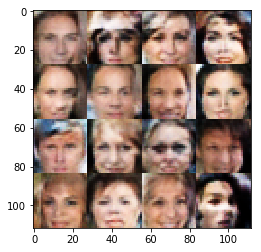

Epoch 1/1       Disc. Loss: 1.1619       Gen. Loss: 0.7637
Epoch 1/1       Disc. Loss: 1.2658       Gen. Loss: 0.6620
Epoch 1/1       Disc. Loss: 1.1499       Gen. Loss: 0.8205
Epoch 1/1       Disc. Loss: 1.1250       Gen. Loss: 0.8815
Epoch 1/1       Disc. Loss: 1.1085       Gen. Loss: 0.8095
Epoch 1/1       Disc. Loss: 1.1754       Gen. Loss: 0.7523
Epoch 1/1       Disc. Loss: 1.2176       Gen. Loss: 0.7528
Epoch 1/1       Disc. Loss: 1.2280       Gen. Loss: 0.6338
Epoch 1/1       Disc. Loss: 1.1523       Gen. Loss: 0.8977
Epoch 1/1       Disc. Loss: 1.1649       Gen. Loss: 0.8526


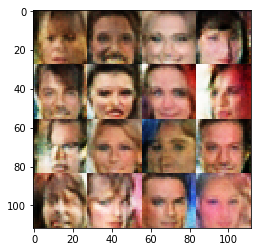

Epoch 1/1       Disc. Loss: 1.0903       Gen. Loss: 1.0360
Epoch 1/1       Disc. Loss: 0.9862       Gen. Loss: 1.1210
Epoch 1/1       Disc. Loss: 1.1879       Gen. Loss: 0.8325
Epoch 1/1       Disc. Loss: 1.2830       Gen. Loss: 0.6250
Epoch 1/1       Disc. Loss: 1.1548       Gen. Loss: 0.7593
Epoch 1/1       Disc. Loss: 0.9959       Gen. Loss: 1.0417
Epoch 1/1       Disc. Loss: 1.1601       Gen. Loss: 0.8546
Epoch 1/1       Disc. Loss: 1.0242       Gen. Loss: 1.0708
Epoch 1/1       Disc. Loss: 1.0390       Gen. Loss: 0.9801
Epoch 1/1       Disc. Loss: 1.2945       Gen. Loss: 0.7520


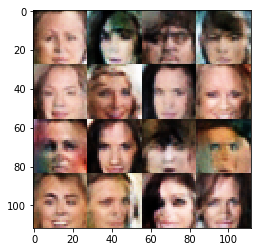

Epoch 1/1       Disc. Loss: 1.2877       Gen. Loss: 0.7384
Epoch 1/1       Disc. Loss: 1.4003       Gen. Loss: 0.6108
Epoch 1/1       Disc. Loss: 1.2408       Gen. Loss: 0.6754
Epoch 1/1       Disc. Loss: 1.3717       Gen. Loss: 0.6058
Epoch 1/1       Disc. Loss: 1.0612       Gen. Loss: 1.1198
Epoch 1/1       Disc. Loss: 0.9406       Gen. Loss: 1.0844
Epoch 1/1       Disc. Loss: 1.3525       Gen. Loss: 0.6183
Epoch 1/1       Disc. Loss: 1.0600       Gen. Loss: 1.0513
Epoch 1/1       Disc. Loss: 1.0672       Gen. Loss: 0.9940
Epoch 1/1       Disc. Loss: 0.8657       Gen. Loss: 1.2925


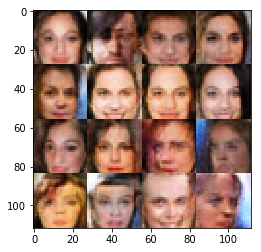

Epoch 1/1       Disc. Loss: 1.3033       Gen. Loss: 0.7990
Epoch 1/1       Disc. Loss: 1.2270       Gen. Loss: 0.8334
Epoch 1/1       Disc. Loss: 1.0419       Gen. Loss: 0.9394


In [15]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.